# Pronostico 2022 - 2026 Maximos Potencia Aparente ET SAN FRANCISCO  Fecha: 13/10/2021 12:55

NOTAS:
Se dispone de los datos del SITEC ordenados cada 15 minutos por Estacion 

1. La demanda en 13 KV del SITEC es la que soportan los trafos de la ET mas la Generacion.
   Por tanto, los trafos soportan lo que transforma cada uno de 132 a 13 KV.

2. Leer la tabla 3 de Transformadores (Guia de Referencia) y colocar ese pronostico como alternativo

3. Detectar automaticamente los Outliers o Atipicos (LISTO)

INFORME
 
1. Al informe se lo presento en word o lo presento con nbviewer

2. Si lo presento con word, tengo que pasar Tablaxls a Excel

NO AHORA

.- Anibal tiene que agregar al Grupo San Francisco la linea SFCO - LAS VARILLAS


## Seteo Inicial

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Viernes 8 Octubre 2021 17:43:11 

@author: Daniel Busso
"""

# Plantilla de Pre Procesado

# Cómo importar las librerías
import numpy    as np
import pandas   as pd
import datetime as dt
import os

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.style.use('fivethirtyeight')

#from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_pacf


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_absolute_percentage_error

#from skforecast.ForecasterAutoreg import ForecasterAutoreg
#from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
#from skforecast.model_selection import grid_search_forecaster
#from skforecast.model_selection import time_series_spliter
#from skforecast.model_selection import cv_forecaster
#from skforecast.model_selection import backtesting_forecaster
#from skforecast.model_selection import backtesting_forecaster_intervals

In [3]:
# Configuracion Pandas

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', '{:.2f}'.format)

## Lectura Demandas en 13 Kv San Francisco
Lectura y creacion del index DateTime para tratar el DataFrame como una Serie de Tiempo

In [4]:
def conversion_2400(fecha):
    if fecha[11:13] != '24':
        return pd.to_datetime(fecha, format='%d/%m/%Y %H:%M')

    fecha = fecha[0:11] + '00:' + fecha[14:]
    return pd.to_datetime(fecha, format='%d/%m/%Y %H:%M') + dt.timedelta(days=1)

In [5]:
# EMPIEZO PROCESANDO UNA CARPETA
# AUTOMATIZAR LECTURAS DE VARIOS ARCHIVOS .PRN ANUALES
# lEER Y CONCATENAR LOS ARCHIVOS .prn DE LA CARPETA DSPractica/eetts/sanfrancisco

import os
import sys
from pathlib import Path

# ELEGIR PLATAFORMA WINDOWS LOCAL O GOOGLE COLABORATORY (la Nube)
if sys.platform == 'linux' :
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  carpeta_trabajo = Path('/content/drive/Othercomputers/LENOVO/DSPractica/eetts/san_francisco/Demanda_13') # Google Colab
else:
  carpeta_inicio  = Path.home()
  carpeta_eett = Path("DSPractica/eetts/san_francisco/Demanda_13")
  carpeta_trabajo = carpeta_inicio / carpeta_eett

archivos = list(carpeta_trabajo.glob('*.prn'))

# Automatizacion de los DataFrames 
dfconca = pd.DataFrame([])
for nombre_completo in archivos:
    dfdatos = pd.read_fwf(nombre_completo, header=0, decimal=',')
    dfconca = pd.concat([dfconca, dfdatos], ignore_index=True)
    
dfconca    

Fecha   Hora    MW  MVAR   MVA  Ampere  KVolt
0       01/01/2010  00:15 15.80 7.13  17.33 711.24  0.00  
1       01/01/2010  00:30 15.63 6.82  17.05 706.06  0.00  
2       01/01/2010  00:45 15.49 6.80  16.91 696.61  0.00  
3       01/01/2010  01:00 15.55 6.81  16.98 698.32  0.00  
4       01/01/2010  01:15 15.50 6.82  16.93 694.93  0.00  
...            ...    ...   ...  ...    ...    ...   ...  
411454  31/12/2021  23:00 23.25 -2.69 23.41 980.38  4.46  
411455  31/12/2021  23:15 22.86 -3.06 23.07 971.29  4.44  
411456  31/12/2021  23:30 22.66 -3.20 22.89 972.08  4.43  
411457  31/12/2021  23:45 22.77 7.82  24.08 993.98  4.45  
411458  31/12/2021  24:00 22.49 7.86  23.82 981.86  4.45  

[411459 rows x 7 columns]

In [6]:
archivos

[WindowsPath('C:/Users/debus/DSPractica/eetts/san_francisco/Demanda_13/MED_DEM_SANFCO13_2010_1201.prn'),
 WindowsPath('C:/Users/debus/DSPractica/eetts/san_francisco/Demanda_13/MED_DEM_SANFCO13_2011_1200.prn'),
 WindowsPath('C:/Users/debus/DSPractica/eetts/san_francisco/Demanda_13/MED_DEM_SANFCO13_2012_1159.prn'),
 WindowsPath('C:/Users/debus/DSPractica/eetts/san_francisco/Demanda_13/MED_DEM_SANFCO13_2013_1157.prn'),
 WindowsPath('C:/Users/debus/DSPractica/eetts/san_francisco/Demanda_13/MED_DEM_SANFCO13_2014_1156.prn'),
 WindowsPath('C:/Users/debus/DSPractica/eetts/san_francisco/Demanda_13/MED_DEM_SANFCO13_2015_1154.prn'),
 WindowsPath('C:/Users/debus/DSPractica/eetts/san_francisco/Demanda_13/MED_DEM_SANFCO13_2016_1152.prn'),
 WindowsPath('C:/Users/debus/DSPractica/eetts/san_francisco/Demanda_13/MED_DEM_SANFCO13_2017_1151.prn'),
 WindowsPath('C:/Users/debus/DSPractica/eetts/san_francisco/Demanda_13/MED_DEM_SANFCO13_2018_1150.prn'),
 WindowsPath('C:/Users/debus/DSPractica/eetts/san_franc

In [7]:
#
# BORRAMOS COLUMNAS NO USADAS
#

del dfconca['Ampere']
del dfconca['KVolt']

In [8]:
# GENERAMOS INDICE DE FECHAS PARA MANEJAR LA SERIE DE TIEMPO

dfconca['Fecha_Hora'] = dfconca['Fecha'] + ' ' + dfconca['Hora']
dfconca['Fecha_Hora'] = dfconca.Fecha_Hora.apply(conversion_2400) # CONVERSION DE HORA 24:00 ---> 00:00

dfconca.set_index('Fecha_Hora', inplace=True)
serie     = dfconca.drop(dfconca.index[-1]) # borro la fila del nuevo anio
serie_ord = serie.sort_index()

datos = serie_ord.copy()
demandas = datos.copy()
demandas

Fecha   Hora    MW  MVAR   MVA
Fecha_Hora                                              
2010-01-01 00:15:00  01/01/2010  00:15 15.80 7.13  17.33
2010-01-01 00:30:00  01/01/2010  00:30 15.63 6.82  17.05
2010-01-01 00:45:00  01/01/2010  00:45 15.49 6.80  16.91
2010-01-01 01:00:00  01/01/2010  01:00 15.55 6.81  16.98
2010-01-01 01:15:00  01/01/2010  01:15 15.50 6.82  16.93
...                         ...    ...   ...  ...    ...
2021-12-31 22:45:00  31/12/2021  22:45 23.42 -2.79 23.58
2021-12-31 23:00:00  31/12/2021  23:00 23.25 -2.69 23.41
2021-12-31 23:15:00  31/12/2021  23:15 22.86 -3.06 23.07
2021-12-31 23:30:00  31/12/2021  23:30 22.66 -3.20 22.89
2021-12-31 23:45:00  31/12/2021  23:45 22.77 7.82  24.08

[411458 rows x 5 columns]

## Depuracion

### Duplicados

In [9]:
if datos.index.has_duplicates:
    print('SI TIENE DUPLICADOS')
else:
    print('NO TIENE DUPLICADOS')

NO TIENE DUPLICADOS


### Chequeo si hay Registros / Filas Faltantes 
----> NO TIENE SENTIDO POR LA CANTIDAD DE DATOS

Si dife distinto de cero, significa que faltan registros/filas en los datos del SITEC

NOTA: Por el momento, no vamos a imputar estos Datos Faltantes

In [10]:
#dti2 = pd.date_range(start='2017-01-01 00:15:00', end='2018-01-01 00:00:00', freq="15min")
#
# No se si es tan completo porque a partir del anio 2016 las mediciones van cada 5 min
indice_completo = pd.date_range(start=datos.index[0], end=datos.index[-1], freq="15min")
#
dife = indice_completo.difference(datos.index)

if dife.empty == False:
    print('Faltan algunas Mediciones: ', len(dife), '% Incompletas= ', (len(dife)/len(indice_completo)*100), '% Completas= ', \
          (((len(indice_completo)-len(dife))/len(indice_completo))*100))
else:
    print('\n')
    print('Mediciones Completas: ', (((len(indice_completo)-len(dife))/len(indice_completo))*100))

Faltan algunas Mediciones:  9309 % Incompletas=  2.2123883289326396 % Completas=  97.78761167106737


### Remover Datos Atipicos

In [11]:
# CALCULO FORMAL DE LOS LIMITES SUPERIOR E INFERIOR
# Demanda = Transformacion 132/13 Kv + Generacion Propia
# Demanda = TD1 + TD2 + TD3 + TG1 + TG2

#Pot_Ins_Tra = pd.Series([25.0, 25.0, 25.0], index=['TD1', 'TD2', 'TD3'])
#POT_INS_TRAFOS = Pot_Ins_Tra.sum()

#Pot_Ins_Gen = pd.Series([20.0, 28.0], index=['TG1', 'TG2'])  # con cos fi = 0.8 TG1 = 16 MW y TG2 = 23 MW 
#POT_INS_GENE = Pot_Ins_Gen.sum()
#POT_TOTAL = POT_INS_TRAFOS + POT_INS_GENE


#indice_ini = datos.index[0] 
#delta = pd.Timedelta(value=90, unit='D')
#indice_fin = indice_ini + delta
#verano = datos.loc[indice_ini:indice_fin, 'MVA'] 

#===============================================================================================================
# LA IDEA ES CALCULAR LOS LIMITES PARA PERIODOS ESTIVALES DE 6 MESES
# PERIODO VERANO1  '2020-01-01':'2020-03-31'
# PERIODO INVIERNO '2020-04-01:2020-09-30'
# PERIODO VERANO2  '2020-10-01:2020-12-31'
#
def lim_sup(q75, q25):
    IQR = q75 - q25
    bigote = 2 * IQR
    return (q75 + bigote)
    
atipicos = pd.Series([])    
anios = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
for anio in anios:
    ver1i = anio + '-01-01 00' 
    ver1f = anio + '-03-31 23'
    invi  = anio + '-04-01 00' 
    invf  = anio + '-09-30 23'
    ver2i = anio + '-10-01 00' 
    ver2f = anio + '-12-31 23'
    
    #verano1  = demandas.loc[ver1i:ver1f, 'MVA'].resample('D').max()
    #invierno = demandas.loc[invi:invf, 'MVA'].resample('D').max()
    #verano2  = demandas.loc[ver2i:ver2f, 'MVA'].resample('D').max()
    verano1  = demandas.loc[ver1i:ver1f, 'MVA']
    invierno = demandas.loc[invi:invf, 'MVA']
    verano2  = demandas.loc[ver2i:ver2f, 'MVA']
    
    lim_sup_ver1 = lim_sup(verano1.quantile(0.75), verano1.quantile(0.25)) 
    lim_sup_inv  = lim_sup(invierno.quantile(0.75), invierno.quantile(0.25)) 
    lim_sup_ver2 = lim_sup(verano2.quantile(0.75), verano2.quantile(0.25)) 
    
    # REMOVER EJEMPLOS DE ATIPICOS 
    #indice1 = pd.to_datetime('2010-01-01 19:08:08')
    #indice  = pd.to_datetime('2010-04-01 19:12:12')
    #indice2 = pd.to_datetime('2010-10-01 19:14:14')
    #demandas.loc[indice1, 'MVA'] = 150.0
    #demandas.loc[indice, 'MVA'] = 150.0
    #demandas.loc[indice2, 'MVA'] = 150.0
    
    # GUARDAR LOS ATIPICOS A REMOVER Y LOS VALORES
    atipicos_ver1 = verano1[verano1   > lim_sup_ver1] 
    atipicos_inv  = invierno[invierno > lim_sup_inv]
    atipicos_ver2 = verano2[verano2   > lim_sup_ver2]    
    atipicos = pd.concat([atipicos, atipicos_ver1, atipicos_inv, atipicos_ver2]) 

atipicos_ord = atipicos.sort_index()
datos = demandas.drop(atipicos.index)
atipicos_ord

2011-12-20 13:15:00   39.99
2011-12-20 13:30:00   40.20
2011-12-20 13:45:00   39.57
2011-12-20 14:00:00   39.58
2012-02-16 14:00:00   43.18
                       ... 
2021-12-30 15:00:00   46.54
2021-12-30 15:15:00   46.25
2021-12-30 15:30:00   46.17
2021-12-30 15:45:00   45.35
2021-12-30 16:00:00   44.48
Length: 1186, dtype: float64

In [12]:
#
# BORRO DATOS ATIPICOS

#foto = datos.loc['2017-01-27 09:30:00':'2017-01-27 09:30:00'].index
#datos = datos.drop(foto)

desde = '2020-10-06 17:15:00'
hasta = '2020-12-14 14:45:00'
indice = datos.loc[desde:hasta].index
datos = datos.drop(indice)


desde = pd.to_datetime(desde)
hasta = pd.to_datetime(hasta)
duracion = hasta - desde
print('Se borro: ', duracion, 'que equivale a tantas mediciones tomadas de a 15 min') 


Se borro:  68 days 21:30:00 que equivale a tantas mediciones tomadas de a 15 min


## Graficas Anuales

### Grafica Maximos Semanales

In [34]:
# GRAFICA MAXIMOS SEMANALES

def Grafica_xSemana(pi, pf):
    z = datos.loc[pi:pf, 'MVA'].resample('W').max() # Datos
    x = z.index # Tiempo

    plt.style.use('fivethirtyeight')
    fig = plt.figure()
    fig, grafico = plt.subplots(figsize=(30, 5), dpi=100)
    
    grafico.plot(x, z, lw=1, label='Potencia Aparente', marker='o')
    grafico.set_xlabel('[ Meses ]')  # Add an x-label to the axes.
    grafico.set_ylabel('[ MVA ]')  # Add a y-label to the axes.
    grafico.set_title("POTENCIA APARENTE SEMANAL " + pi + ' ' + pf)  # Add a title to the axes.
    grafico.legend()  # Add a legend.
    #grafico.annotate('Pico Max', xy=(01-31 14:45, 75), xytext=(01-31 15:00, 75), arrowprops=dict(facecolor='black', shrink=0.05)
    #grafico.grid()
    #fig.savefig("Todos_Anios_xSemana.png")

### Grafica Por Minuto

In [39]:
# Grafica anual de la Potencia Aparente cada 15 minutos

def Grafica_xmin(pi, pf):
    y = datos.loc[pi:pf, 'MVA']
    x = y.index
    
    plt.style.use('fivethirtyeight')
    fig = plt.figure()
    fig, grafico = plt.subplots(figsize=(30, 5), dpi=100)
    
    grafico.plot(x, y, lw=1.5, label='Potencia Aparente x Minuto')
    # grafico.plot(x, y, lw=1, label='Potencia Aparente', marker='o')
    grafico.set_xlabel('[ Meses ]')  # Add an x-label to the axes.
    grafico.set_ylabel('[ MVA ]')  # Add a y-label to the axes.
    grafico.set_title("POTENCIA APARENTE [minutos] " + anio)  # Add a title to the axes.
    grafico.legend()  # Add a legend.
    
    #grafico.grid(visible='True', which='major', axis='both', color='black', alpha=1, linewidth=0.5)
    grafico.grid(visible='True', which='major', axis='both', color='black', linewidth=0.5)
    
    x2 = pd.date_range(start=pi+'-01-01', end=pf+'-12-31', periods=5)
    grafico.set_xticks(x2)
    #grafico.annotate('Pico Max', xy=(01-31 14:45, 75), xytext=(01-31 15:00, 75), arrowprops=dict(facecolor='black', shrink=0.05)
    #grafico.grid()
    #fig.savefig("Serie_Anual_15min_"+anio+".png")

### Grafica por Dia

In [36]:
# Grafica del Pico Maximo Potencia Aparente x DIA
from matplotlib import ticker

def Grafica_xDia(pi, pf):
    y = datos.loc[pi:pf, 'MVA'].resample('D').max()
    x = y.index
    
    plt.style.use('fivethirtyeight')
    fig = plt.figure()
    fig, grafico = plt.subplots(figsize=(30, 5), dpi=100)
    
    grafico.plot(x, y, lw=1.5, label='Potencia Aparente x Dia', marker='o')
    grafico.set_xlabel('[ Meses ]')  # Add an x-label to the axes.
    grafico.set_ylabel('[ MVA ]')  # Add a y-label to the axes.
    grafico.set_title("POTENCIA APARENTE DIARIA " + anio)  # Add a title to the axes.
    grafico.legend()  # Add a legend.
    
    #grafico.grid(visible='True', which='major', axis='both', color='black', alpha=1, linewidth=0.5)
    grafico.grid(visible='True', which='major', axis='both', color='black', linewidth=0.5)
    
    x2 = pd.date_range(start=pi+'-01-01', end=pf+'-12-31', periods=5)
    grafico.set_xticks(x2)
    
    #grafico.annotate('Pico Max', xy=(01-31 14:45, 75), xytext=(01-31 15:00, 75), arrowprops=dict(facecolor='black', shrink=0.05)
    #grafico.grid()
    #fig.savefig("Serie_Anual_xDia_"+anio+".png")         

### Grafica del Pico Maximo Anual

In [37]:
# GRAFICA DEL PICO MAXIMO POTENCIA APARENTE (CADA 15 MINUTOS) VENTANA 12 hs ANTES y 12 hs DESPUES
#
def Grafica_Pico_Anual(pi, pf):
    indice_max = datos.loc[pi:pf, 'MVA'].idxmax()
    delta = pd.Timedelta('12 hours')
    indice_mas12   = indice_max + delta
    indice_menos12 = indice_max - delta
    maximo = datos.loc[indice_menos12:indice_mas12, 'MVA'].max()
    
    y = datos.loc[indice_menos12 : indice_mas12, 'MVA'] # Datos
    x = y.index  # Tiempo
    
    plt.style.use('classic')
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
    Rotulo = 'Pico: ' + str(indice_max) + ' ' + str(maximo)
    
    ax.plot(x, y, lw=1, label=Rotulo, marker='o')
    ax.minorticks_on()
    ax.grid(b=True, which='major', color='blue', alpha=1, linewidth=1, ls='-')
    ax.grid(b=True, which='minor', color='beige', alpha=1, linewidth=1)
    # Major Tick Label
    # Minor Tick Label
    plt.xticks(fontsize=15, rotation=90)
    ax.set_xlabel('[ Horas ]', fontsize=15)  # Add an x-label to the axes.
    ax.set_ylabel('[ MVA ]', fontsize=15)  # Add a y-label to the axes.
    ax.set_title("PICO MAXIMO POTENCIA APARENTE " + anio)  # Add a title to the axes.
    ax.legend(loc='lower left')  # Add a legend.
    #fig.savefig("Pico_Anual_"+anio+".png")
        
    
    #print(indice_menos12)
    print(indice_max, datos.loc[indice_menos12:indice_mas12, 'MW'].max(), datos.loc[indice_menos12:indice_mas12, 'MVA'].max())
    #print(indice_mas12)
    #maximo = datos.loc[indice_max:indice_max, 'MVA']
    #print(maximo[0])

<Figure size 432x288 with 0 Axes>

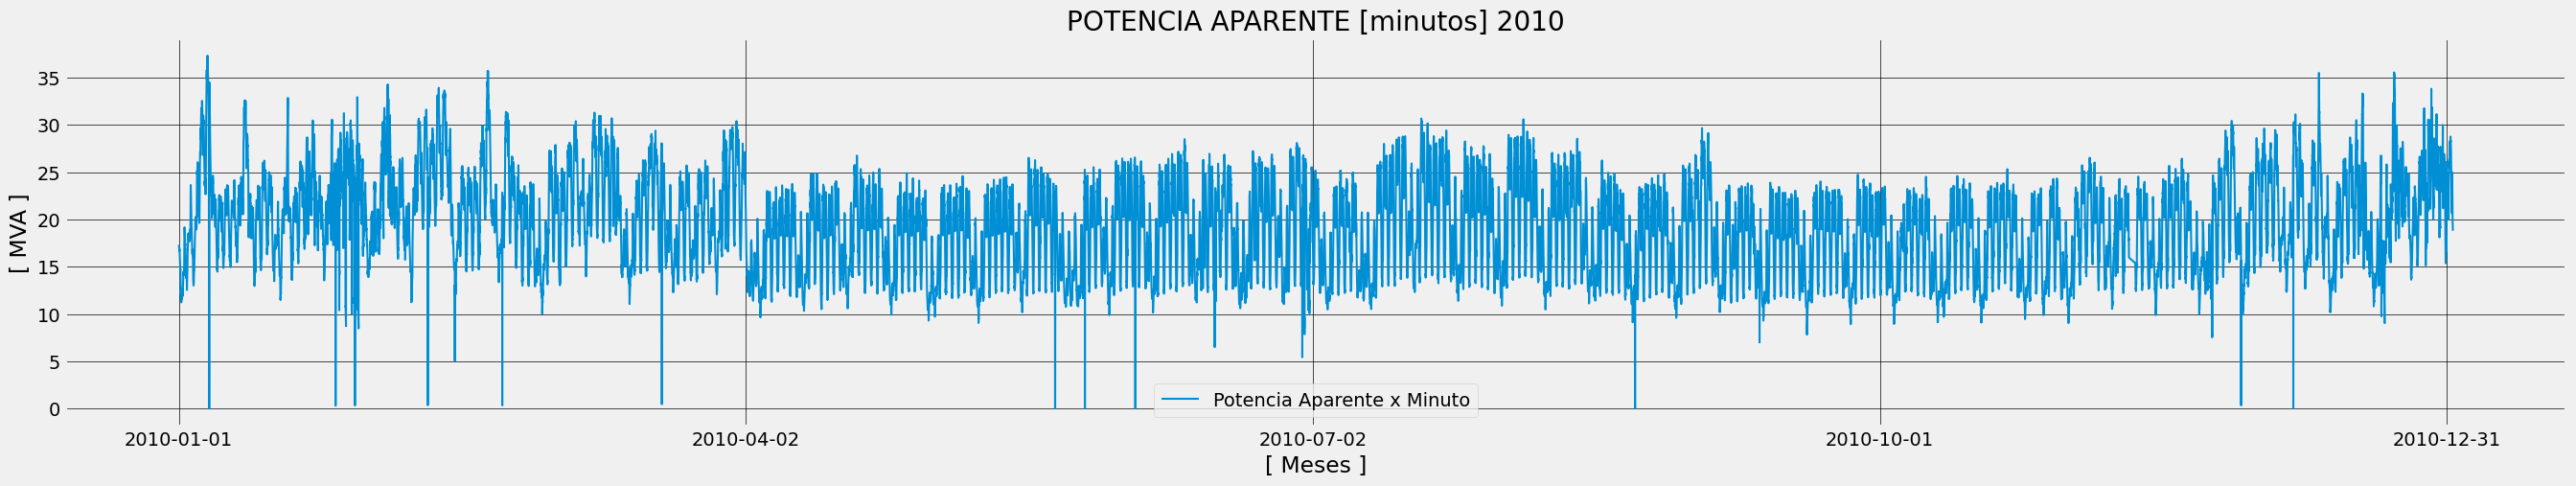

<Figure size 432x288 with 0 Axes>

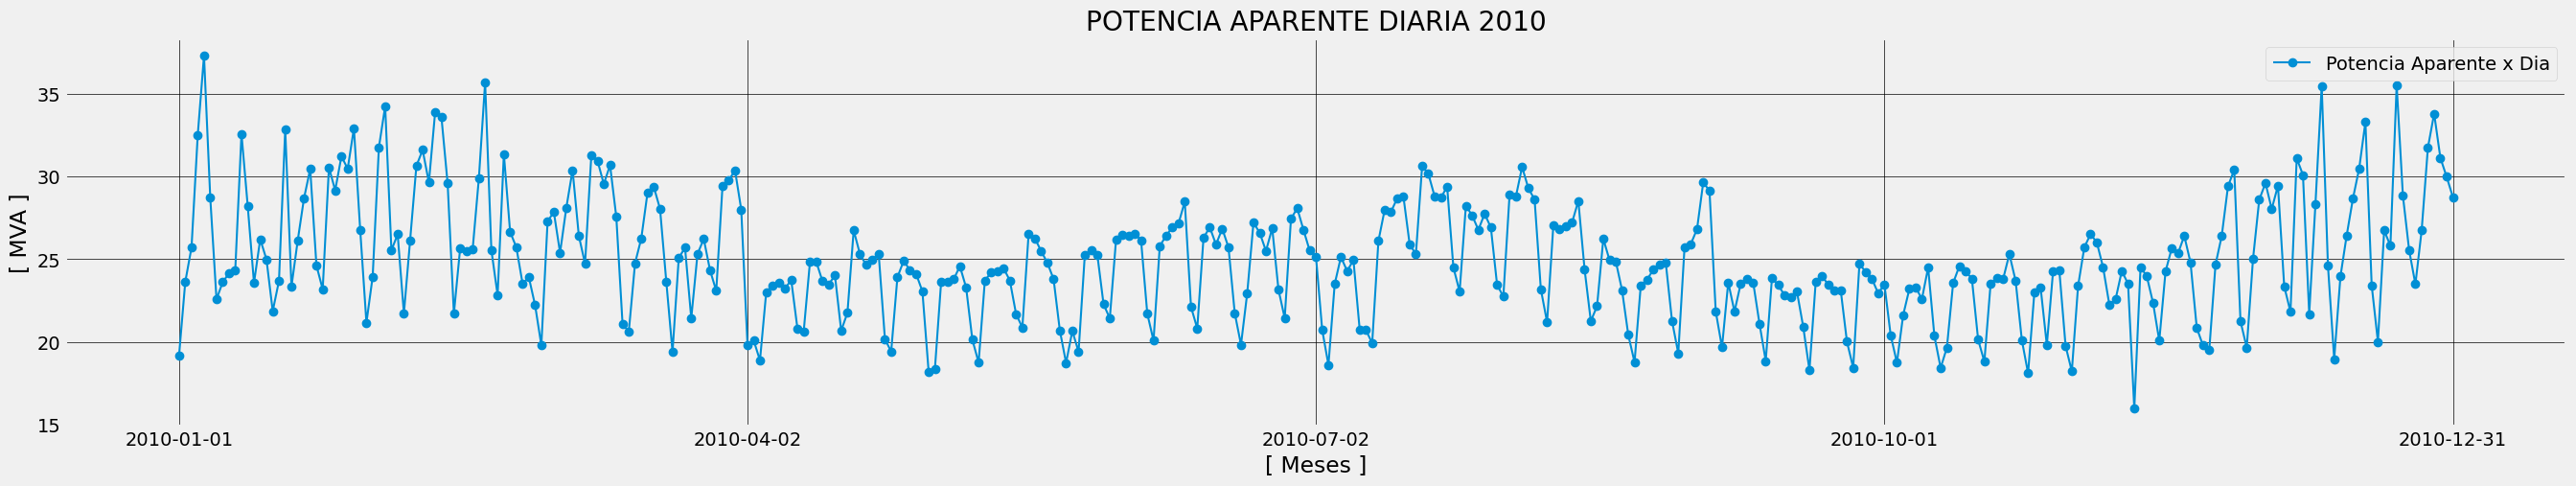

<Figure size 432x288 with 0 Axes>

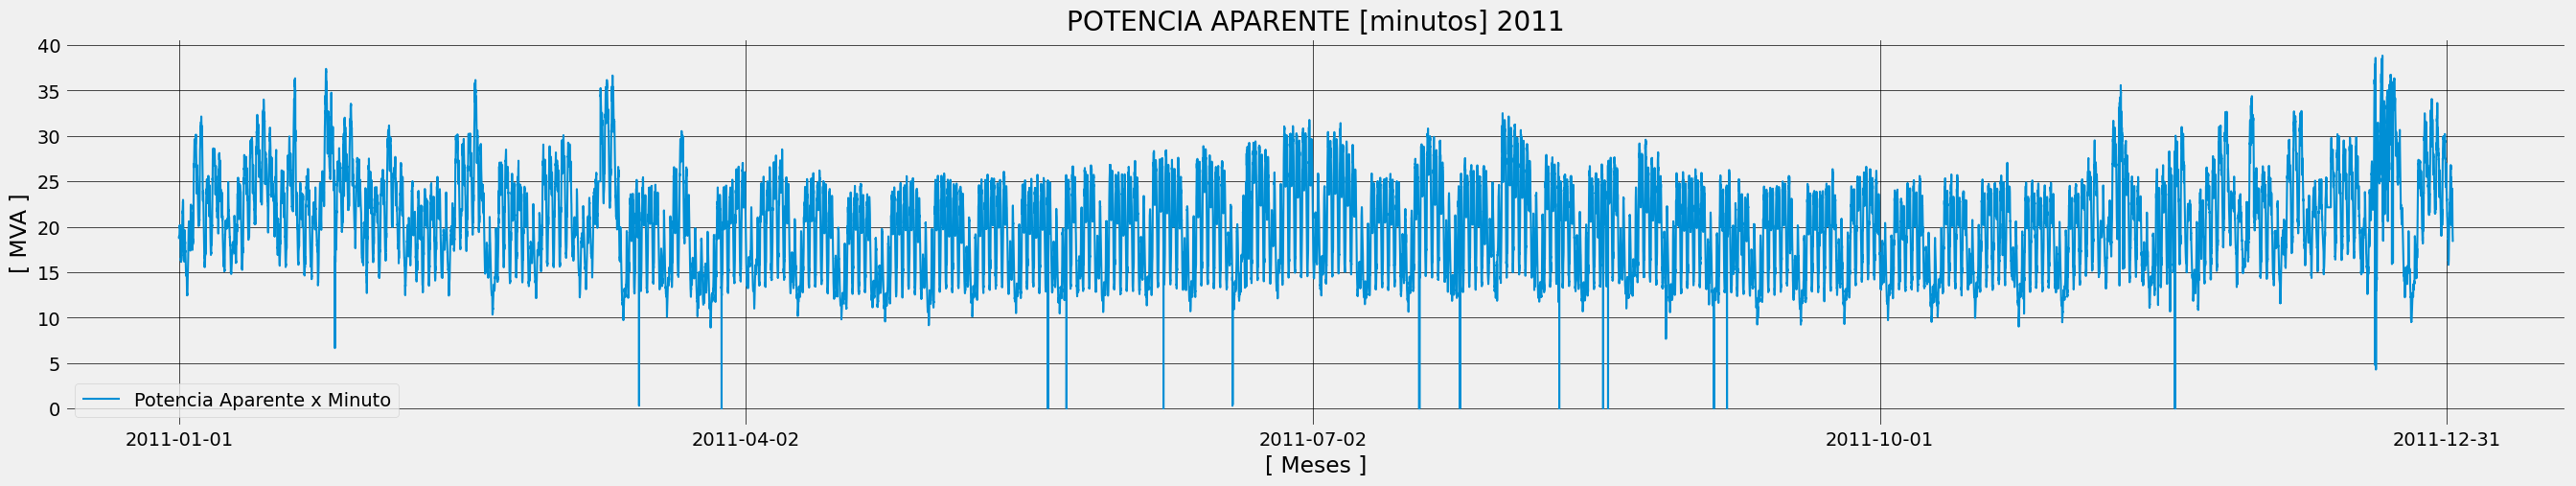

<Figure size 432x288 with 0 Axes>

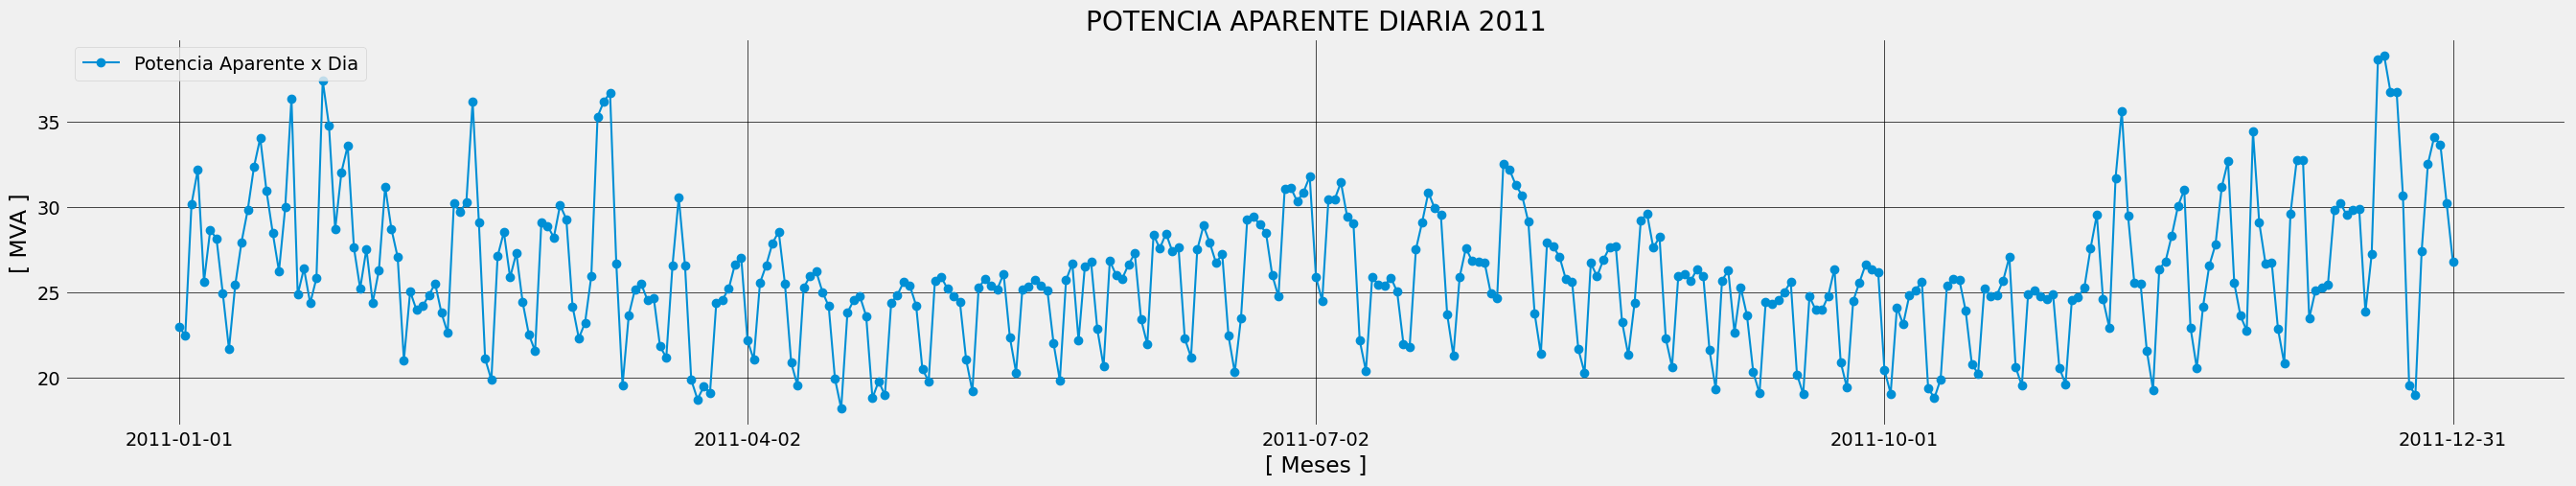

<Figure size 432x288 with 0 Axes>

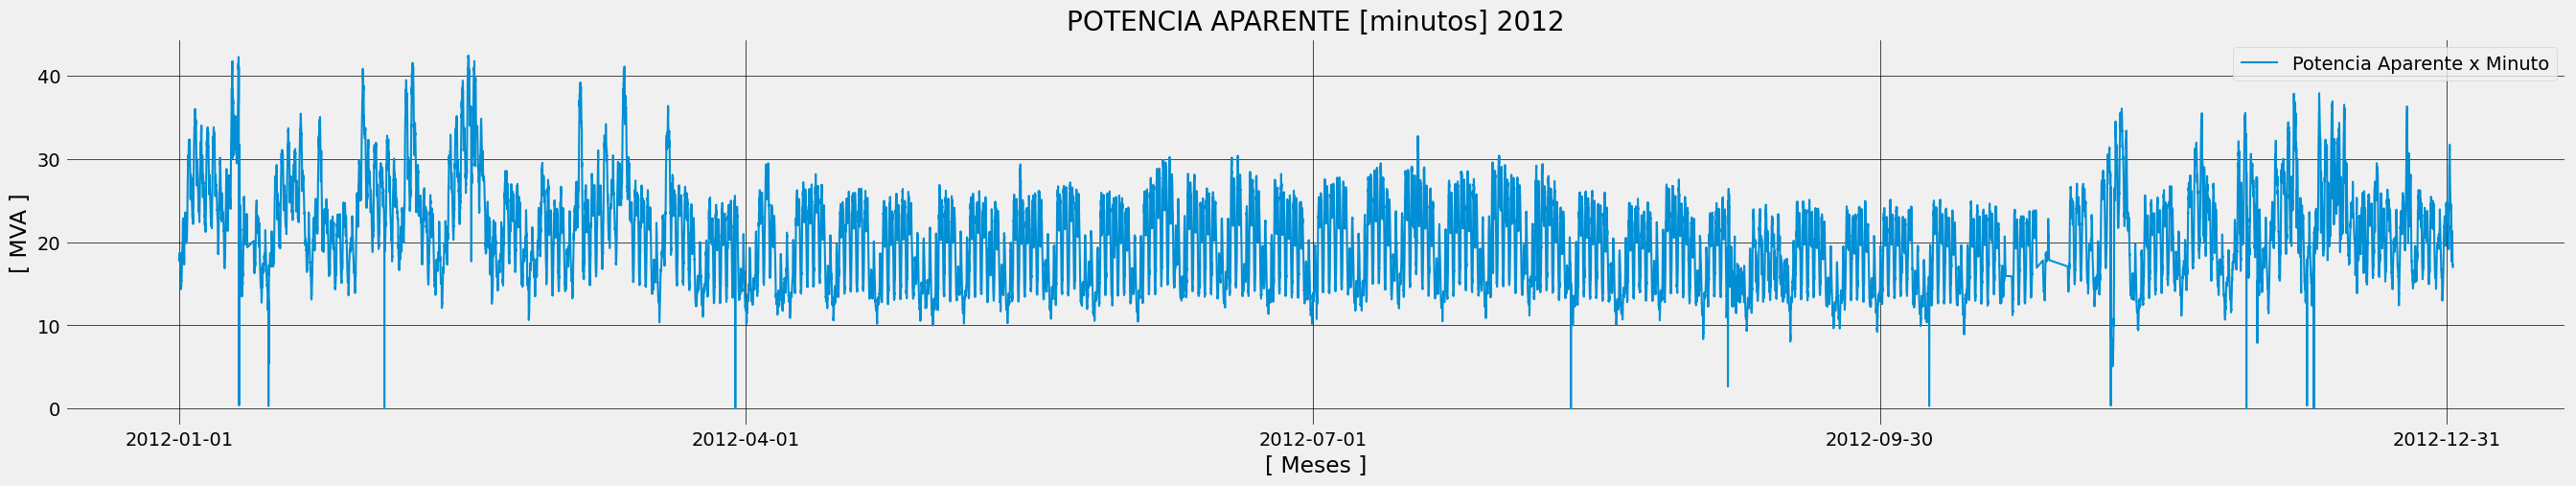

<Figure size 432x288 with 0 Axes>

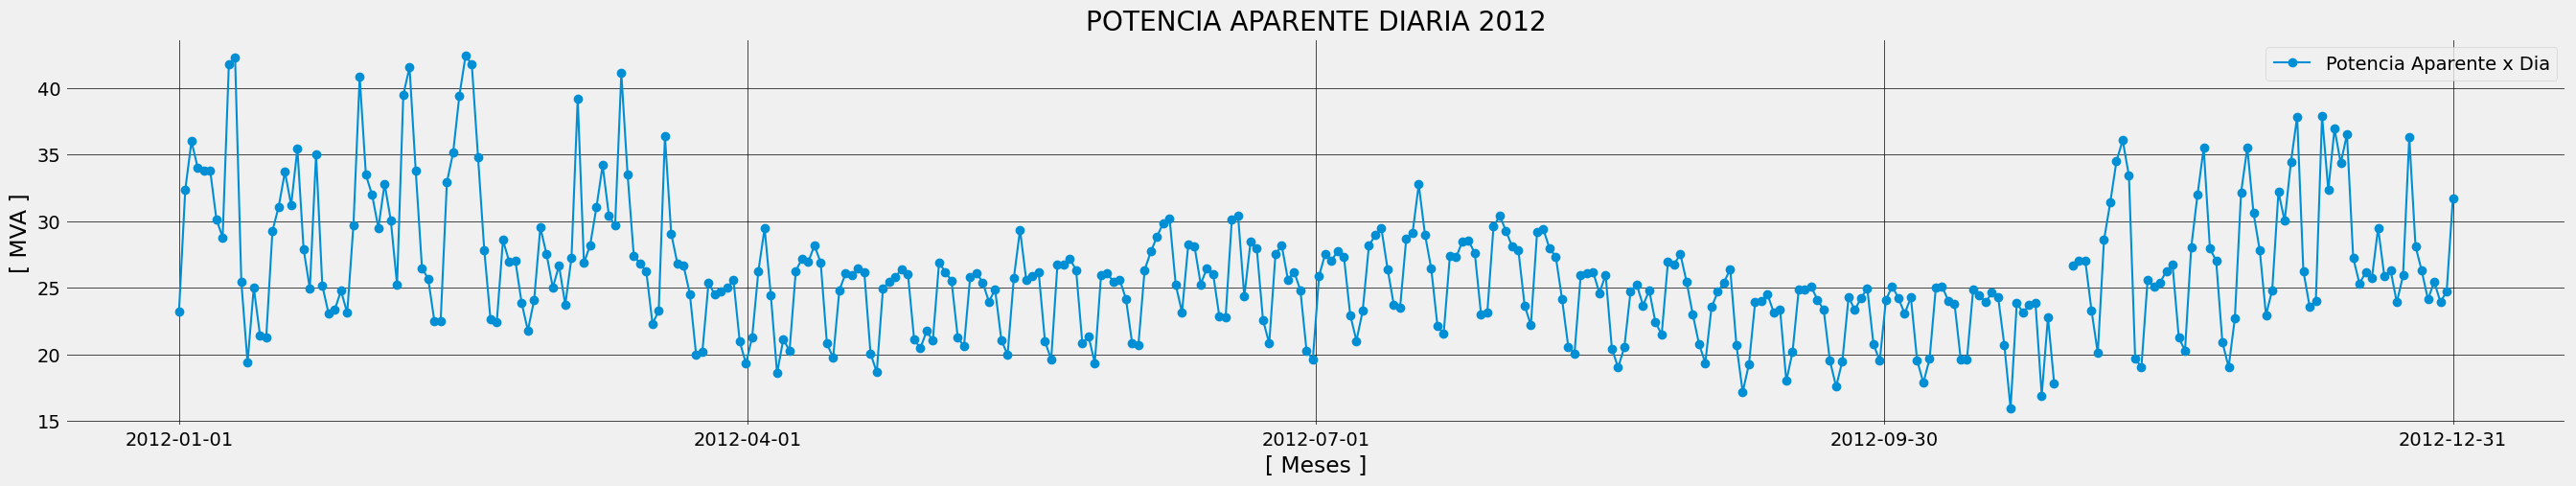

<Figure size 432x288 with 0 Axes>

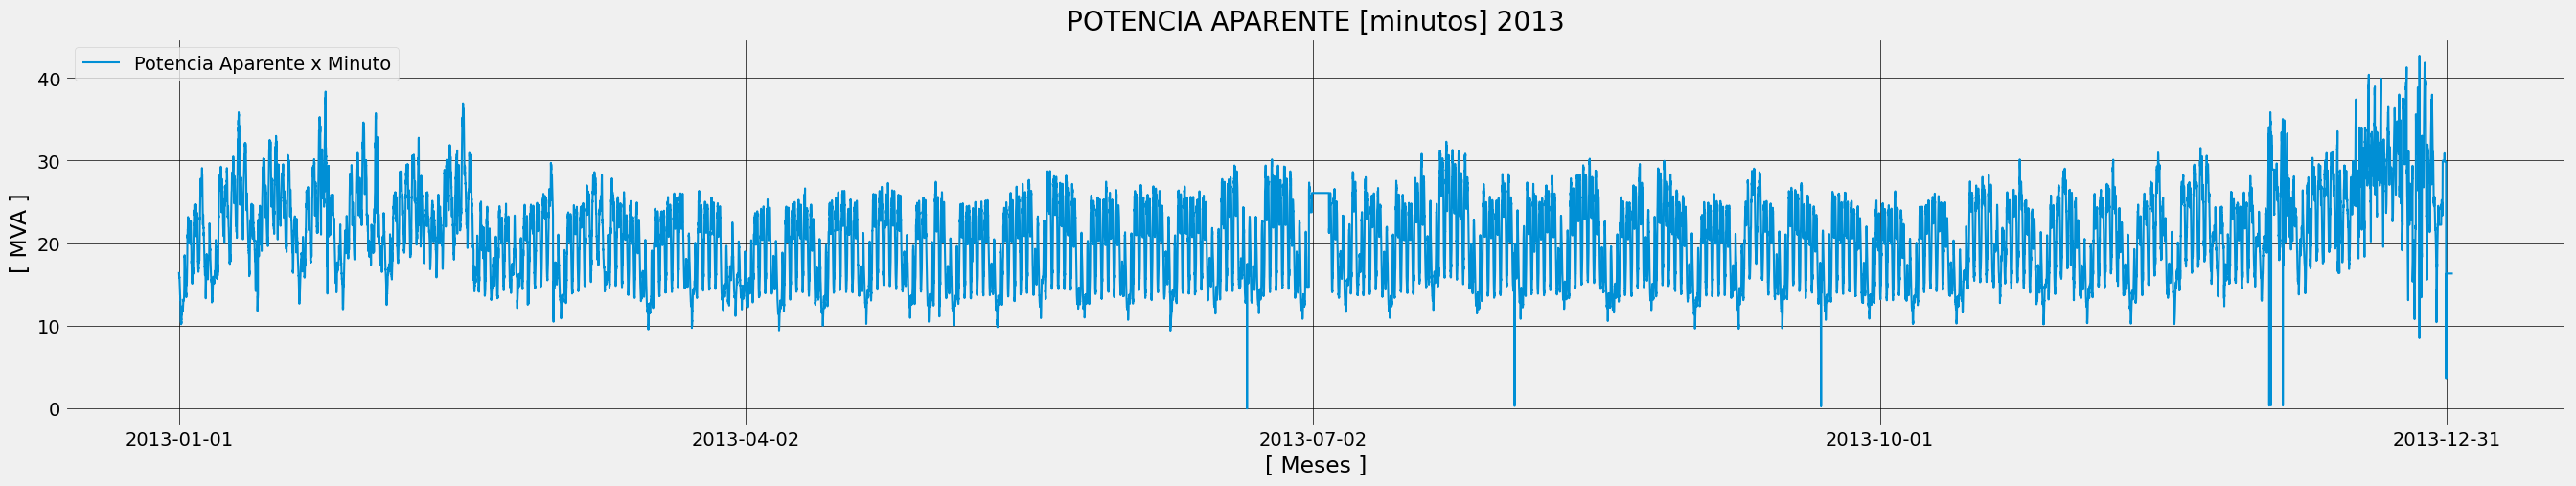

<Figure size 432x288 with 0 Axes>

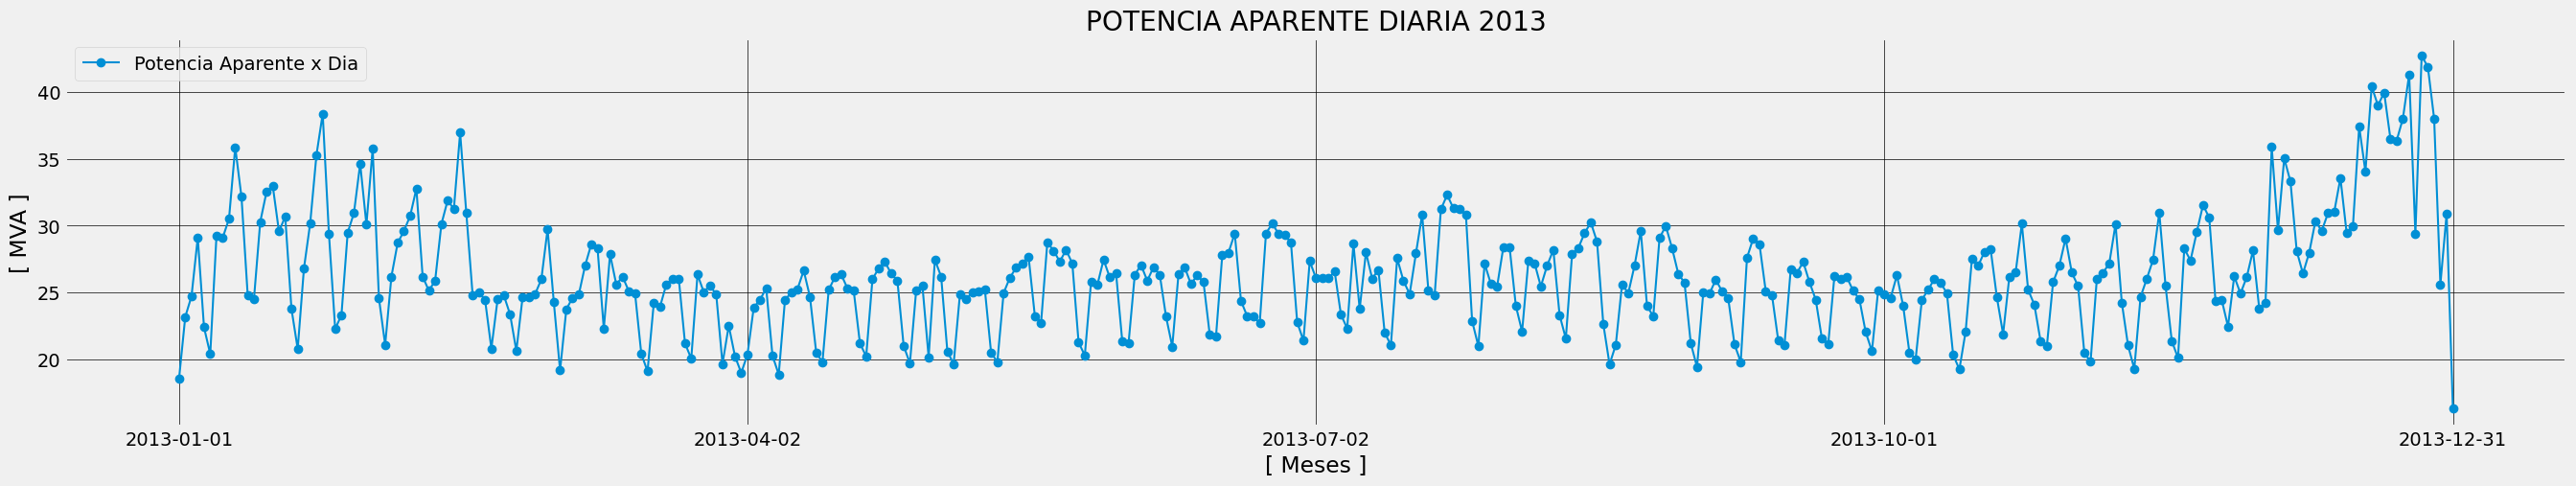

<Figure size 432x288 with 0 Axes>

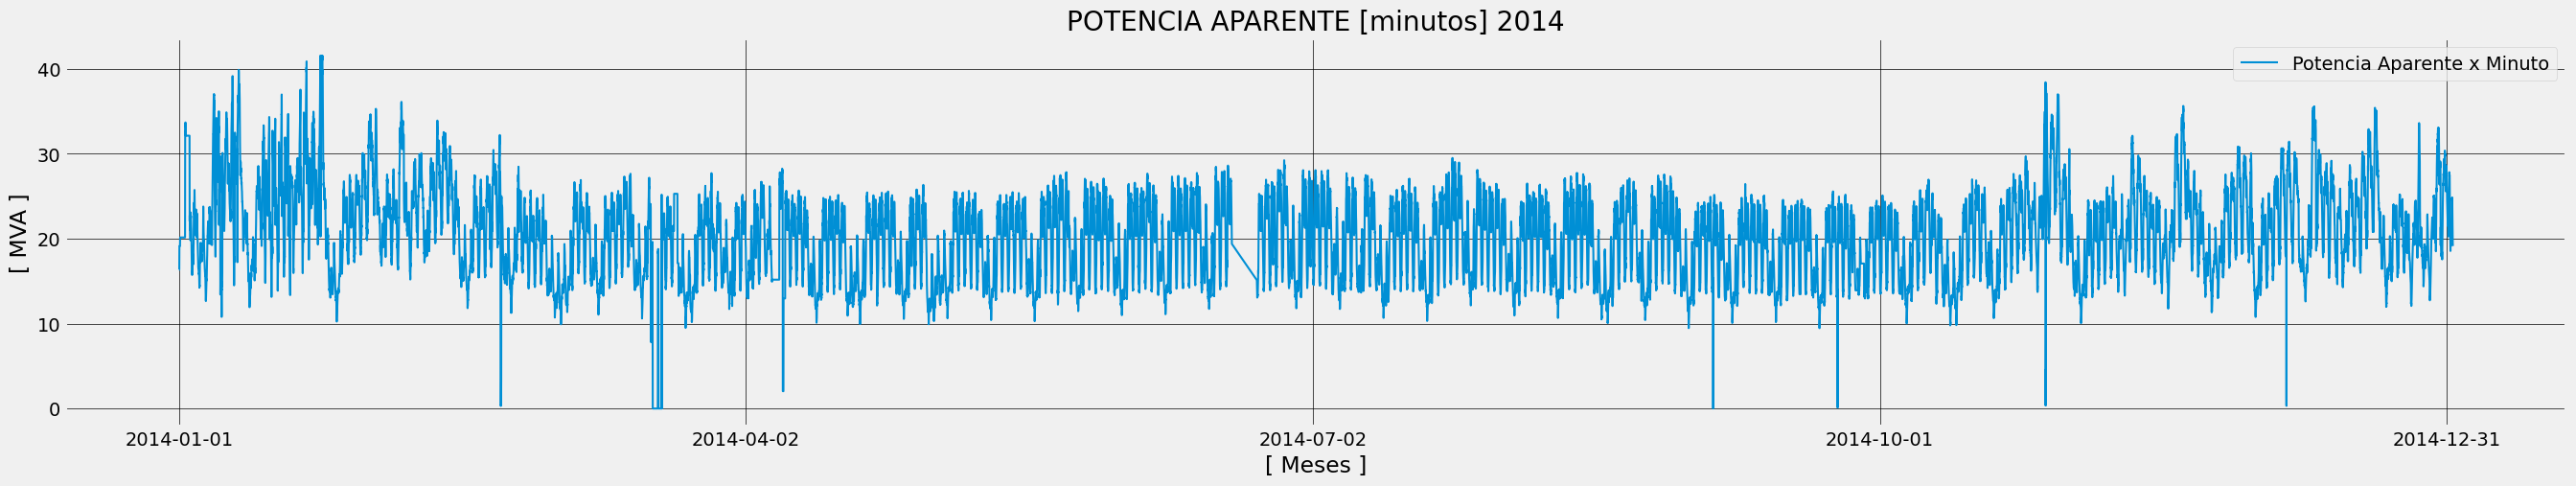

<Figure size 432x288 with 0 Axes>

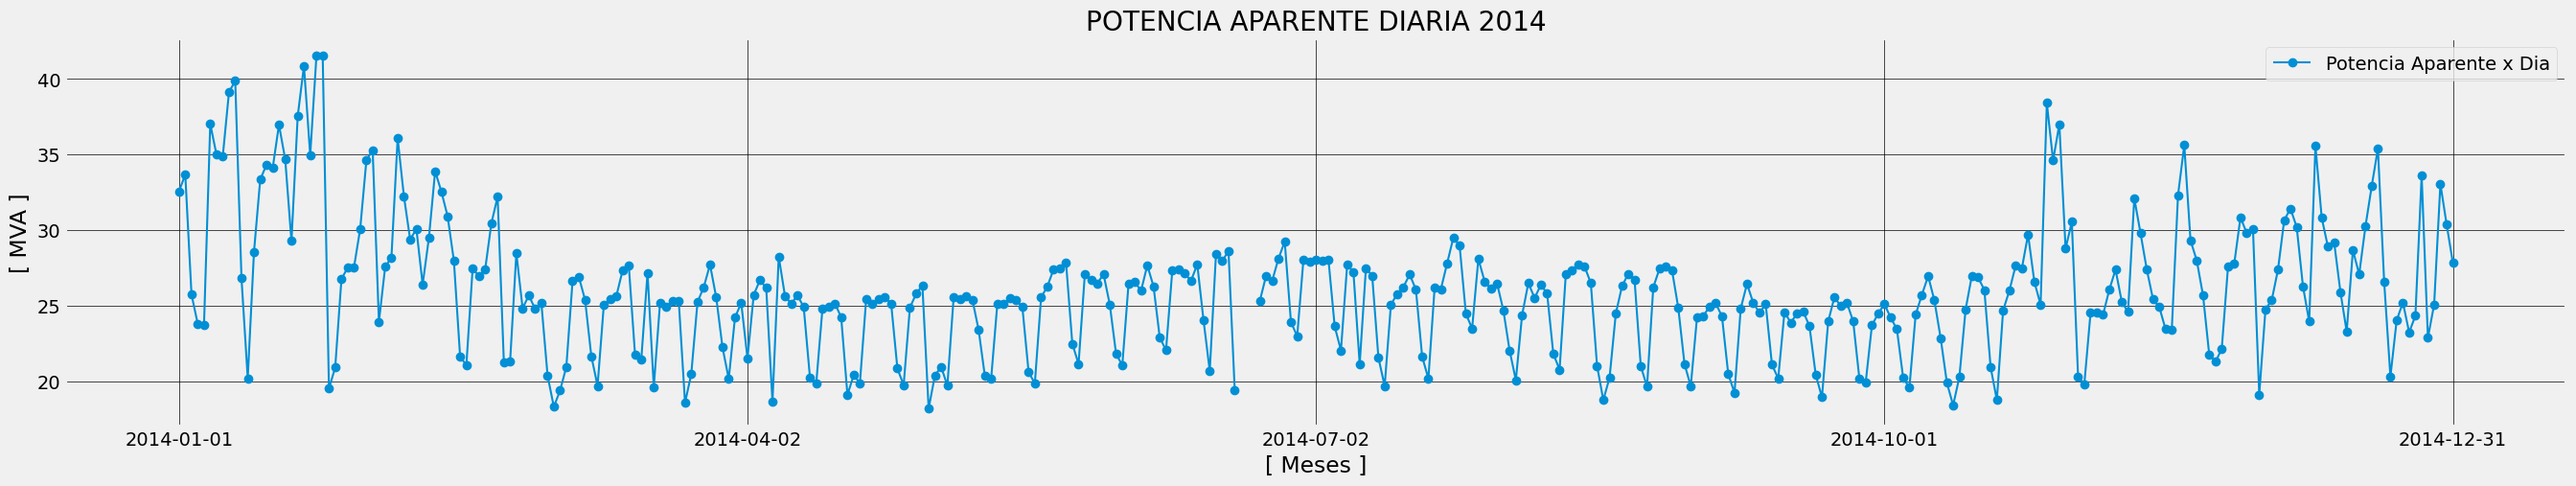

<Figure size 432x288 with 0 Axes>

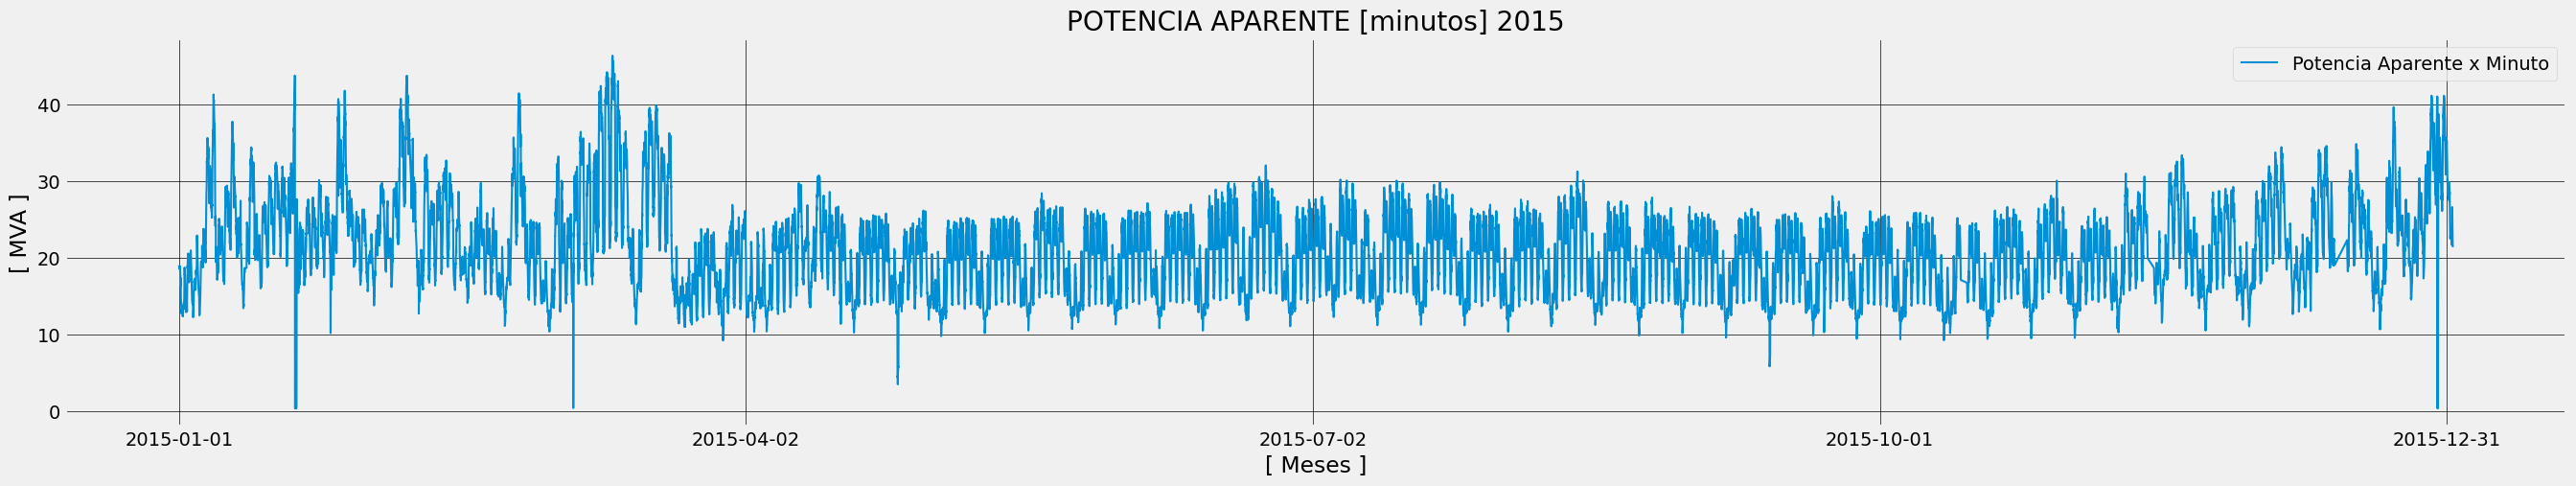

<Figure size 432x288 with 0 Axes>

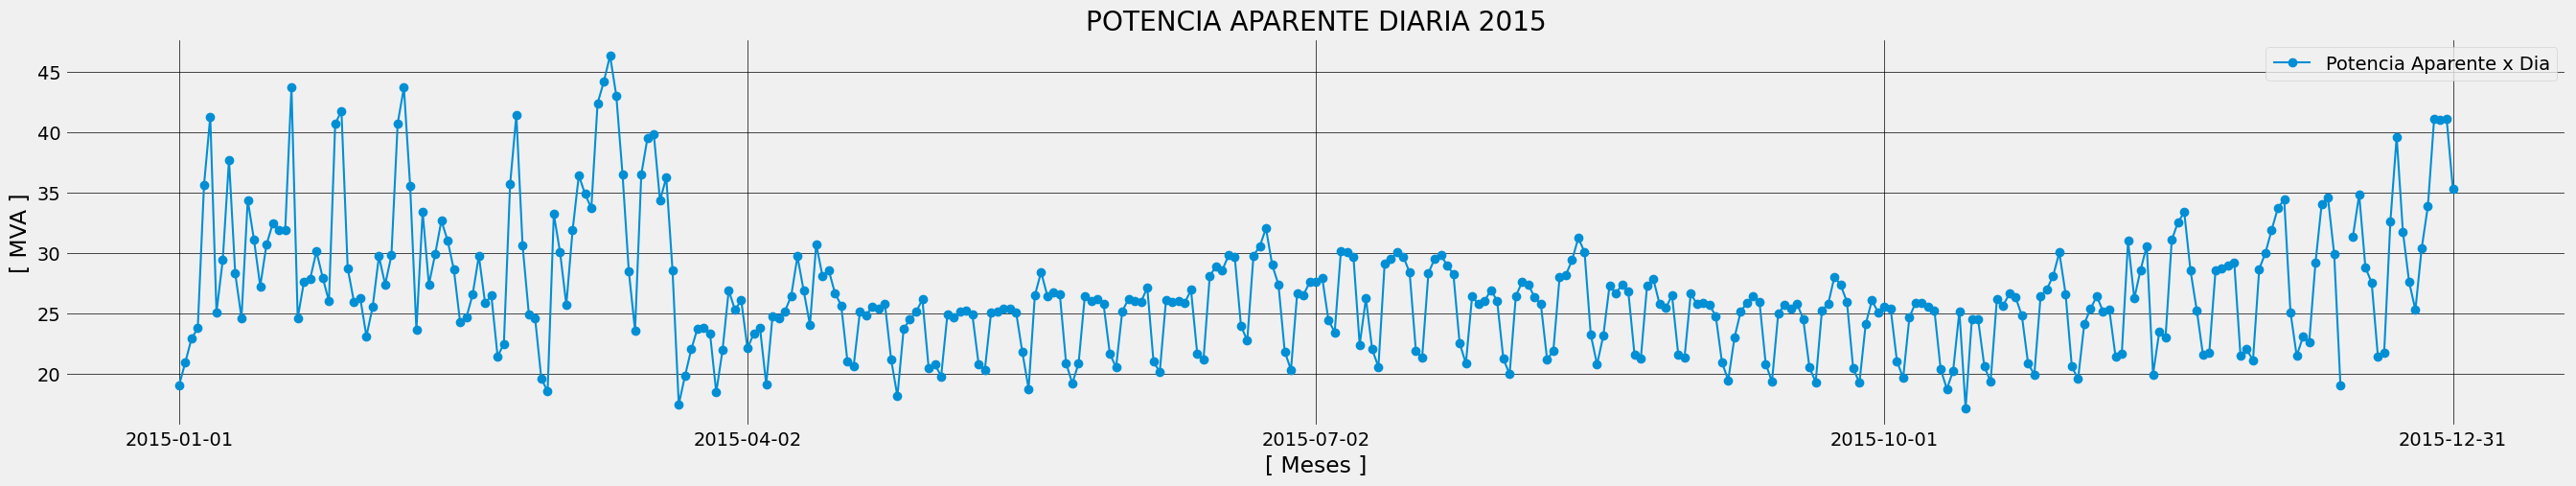

<Figure size 432x288 with 0 Axes>

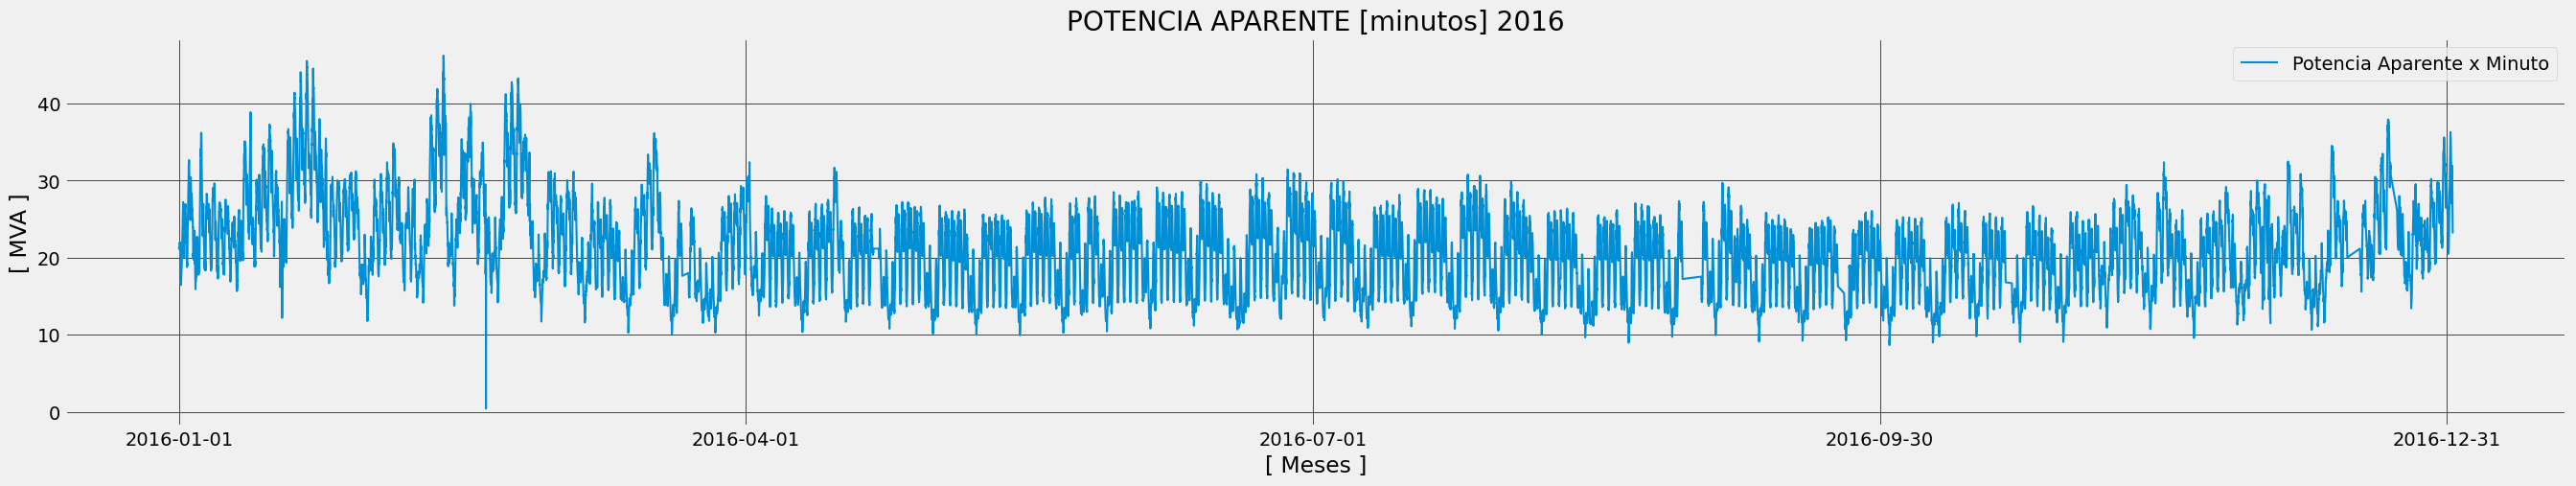

<Figure size 432x288 with 0 Axes>

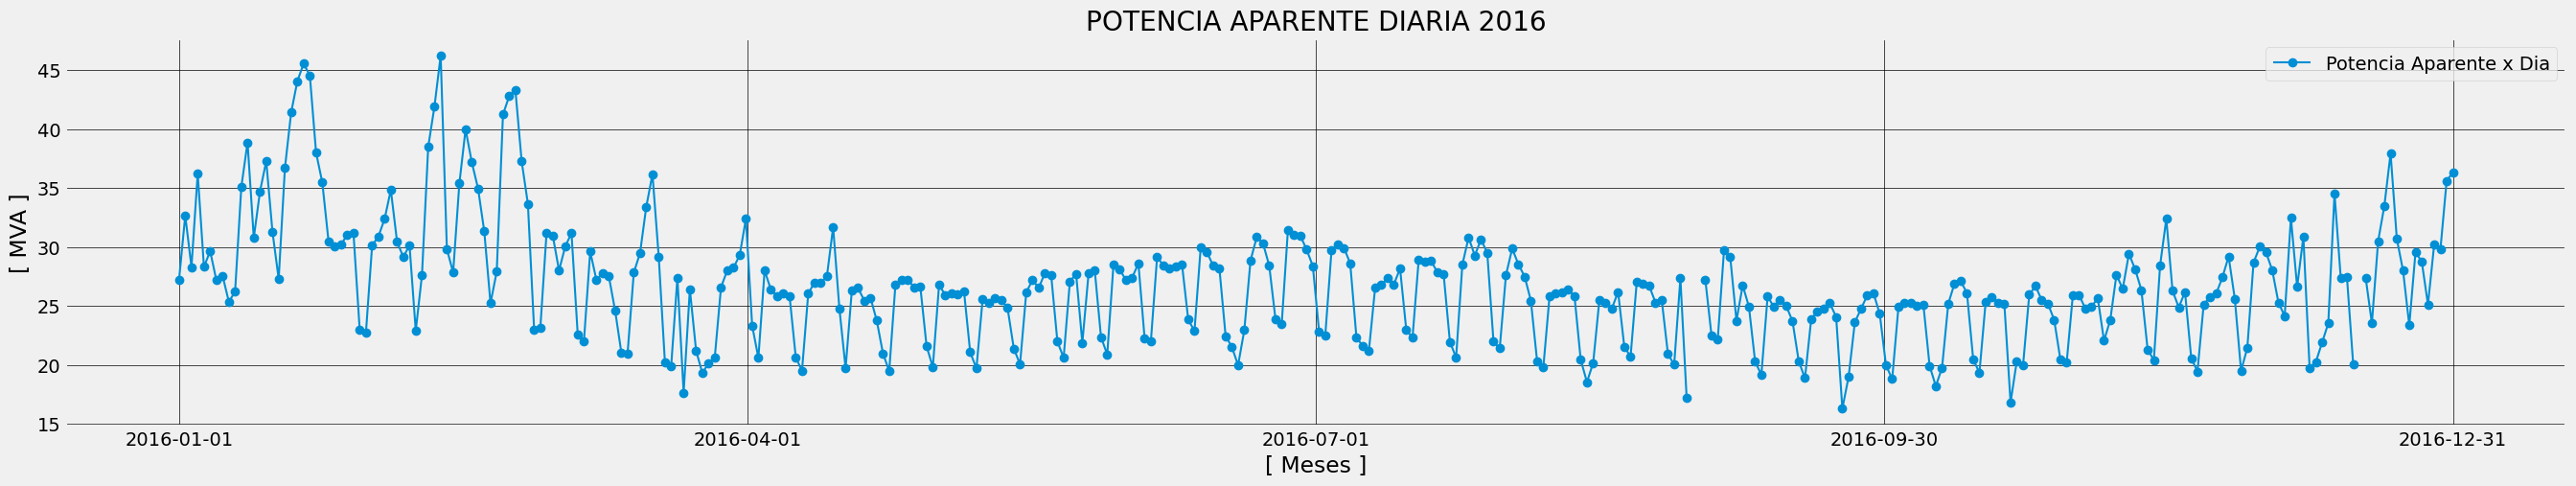

<Figure size 432x288 with 0 Axes>

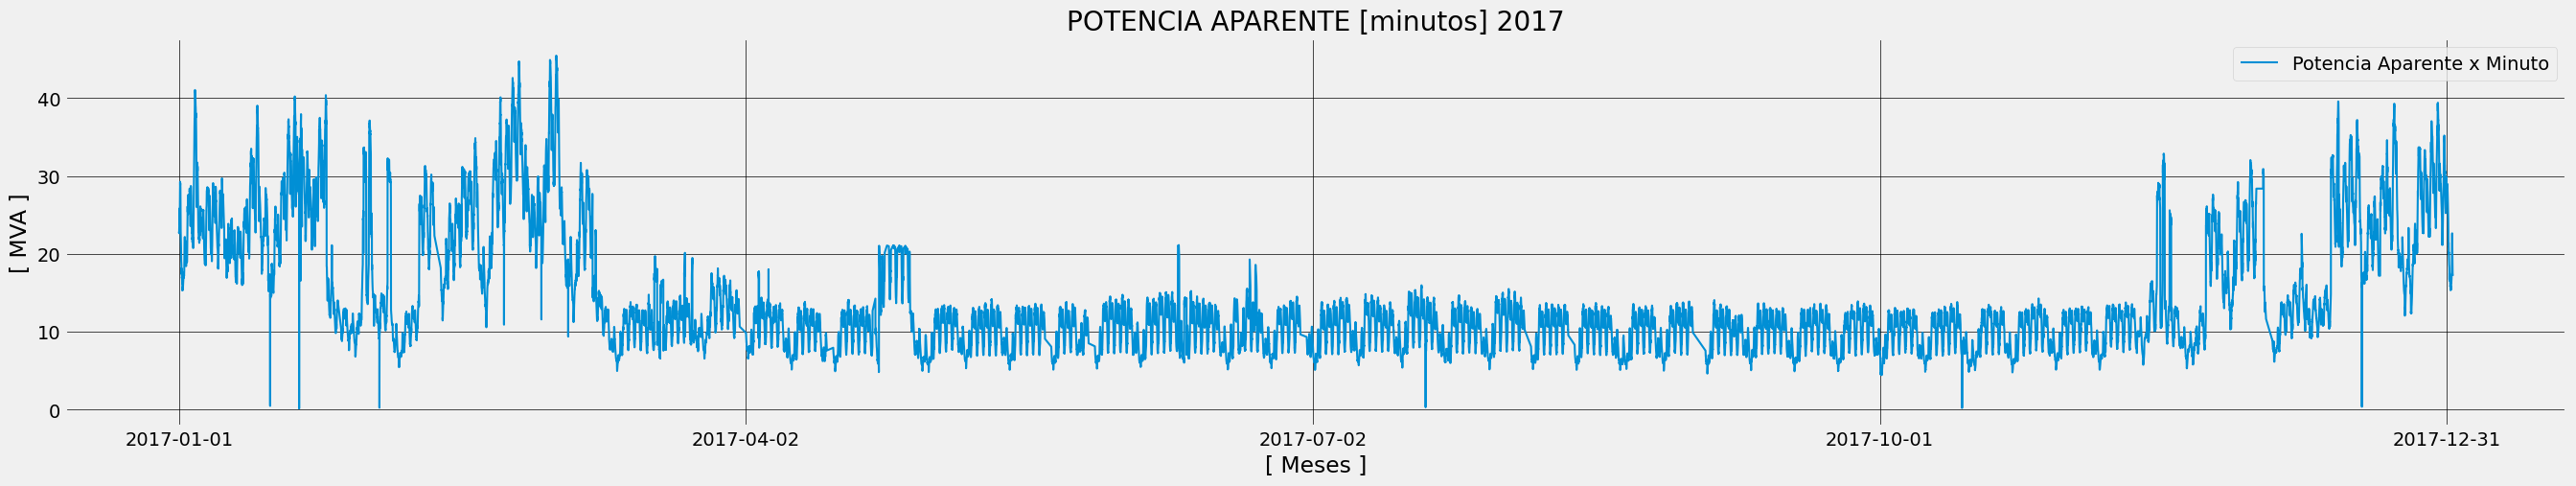

<Figure size 432x288 with 0 Axes>

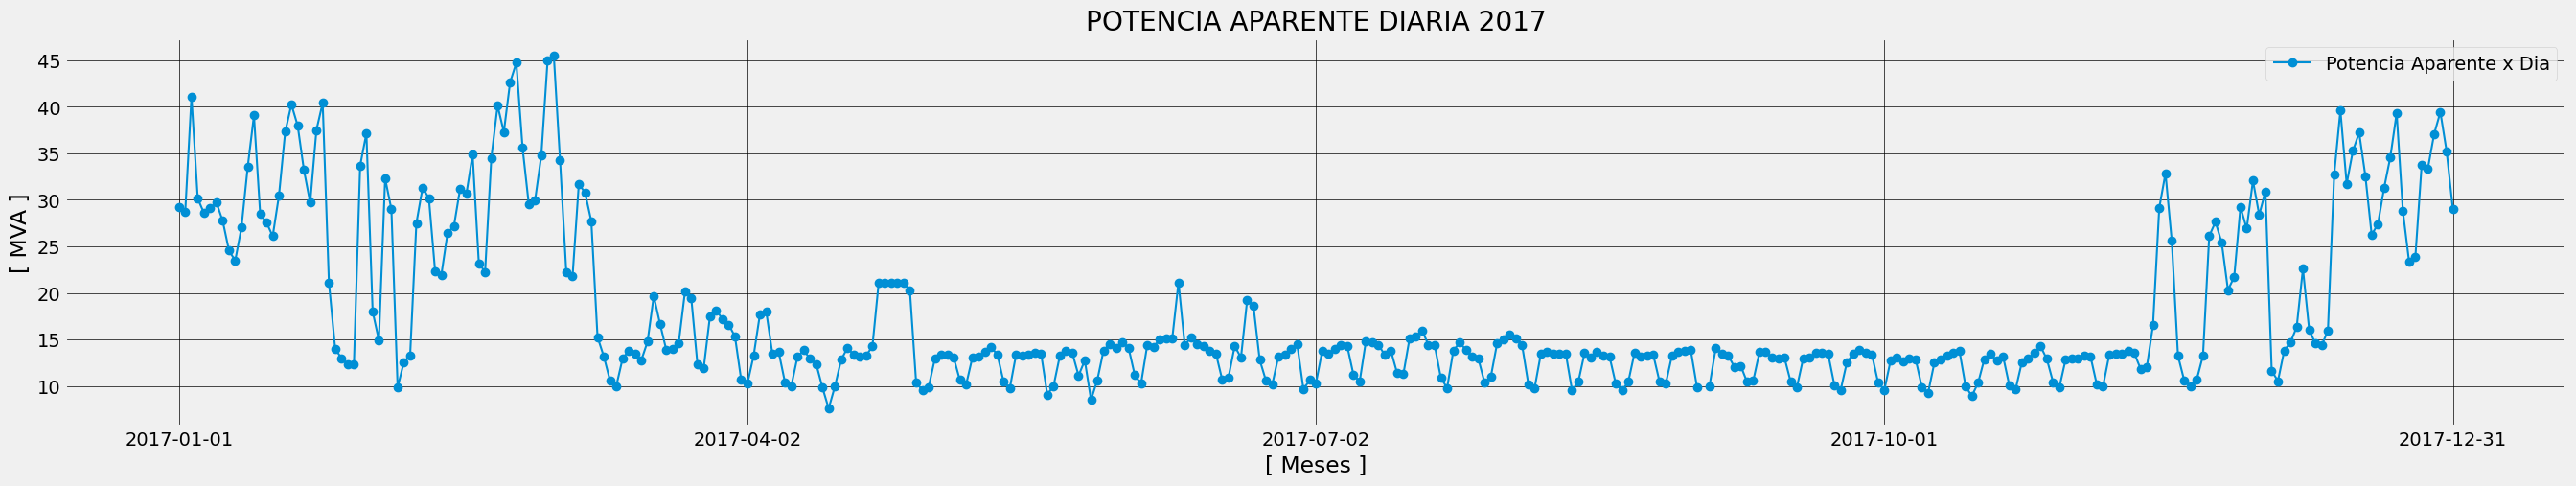

<Figure size 432x288 with 0 Axes>

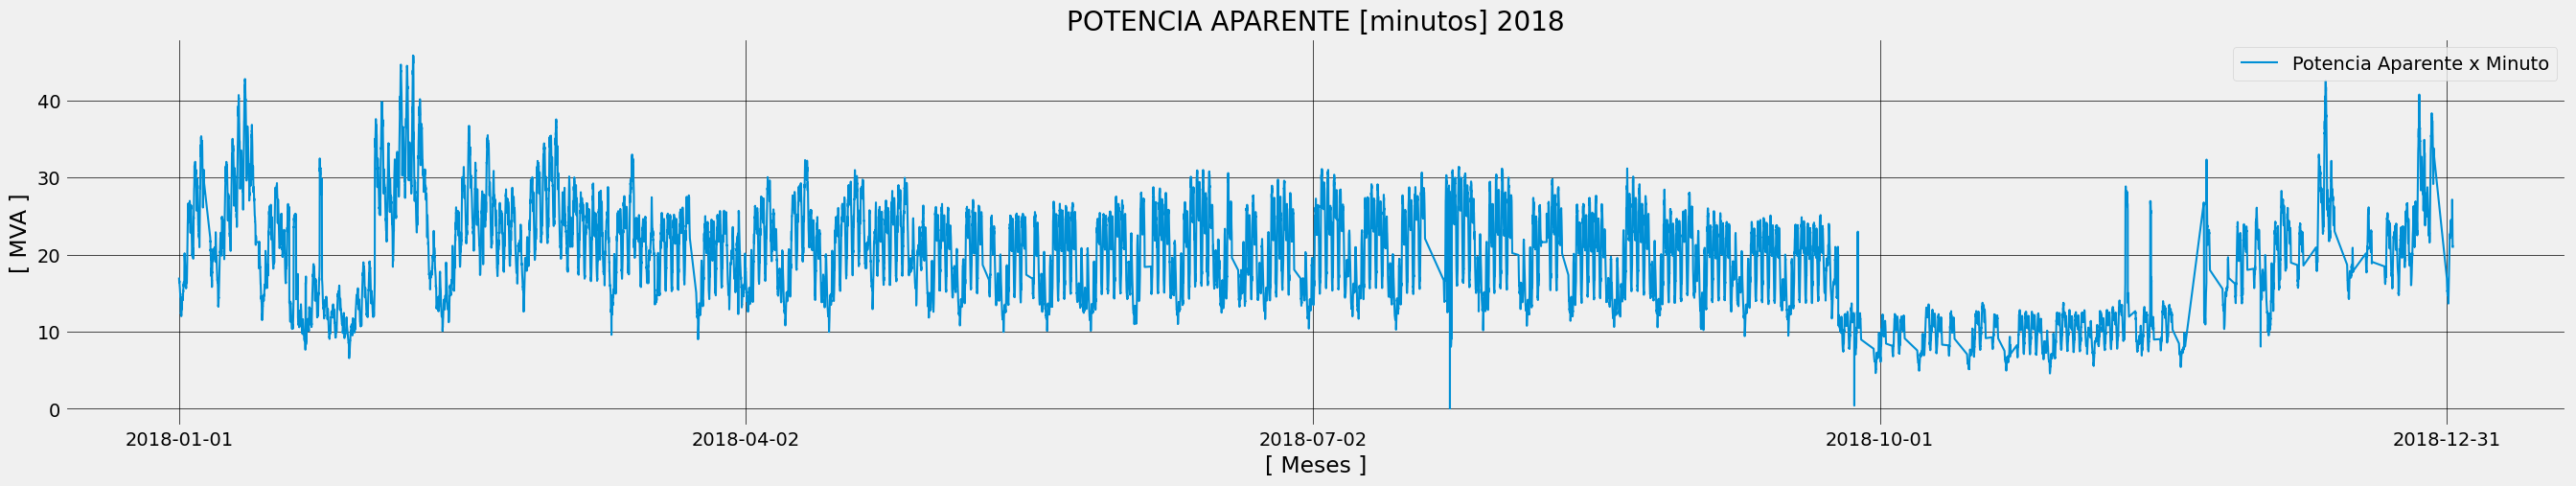

<Figure size 432x288 with 0 Axes>

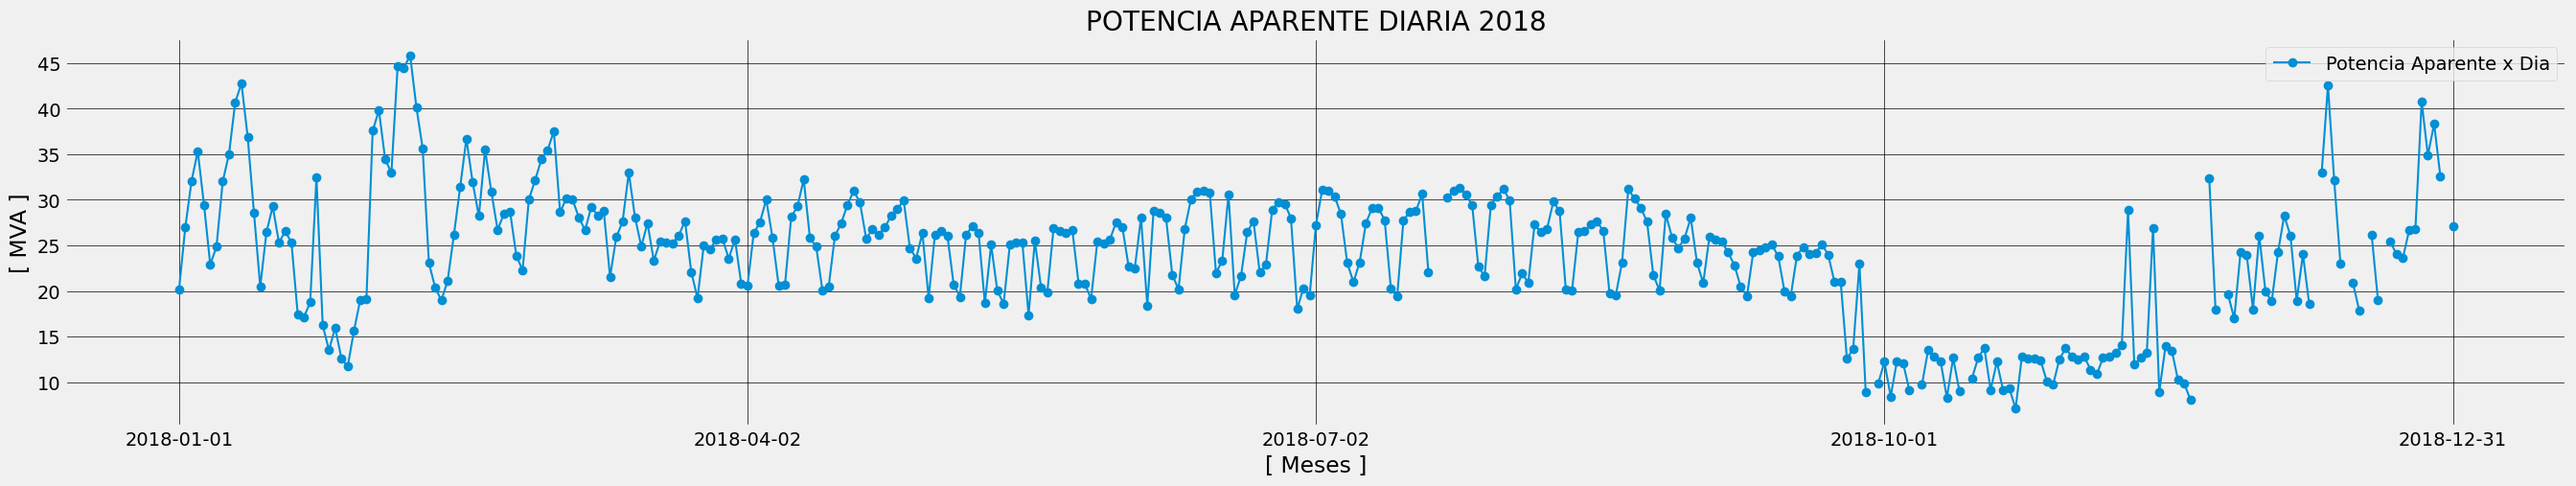

<Figure size 432x288 with 0 Axes>

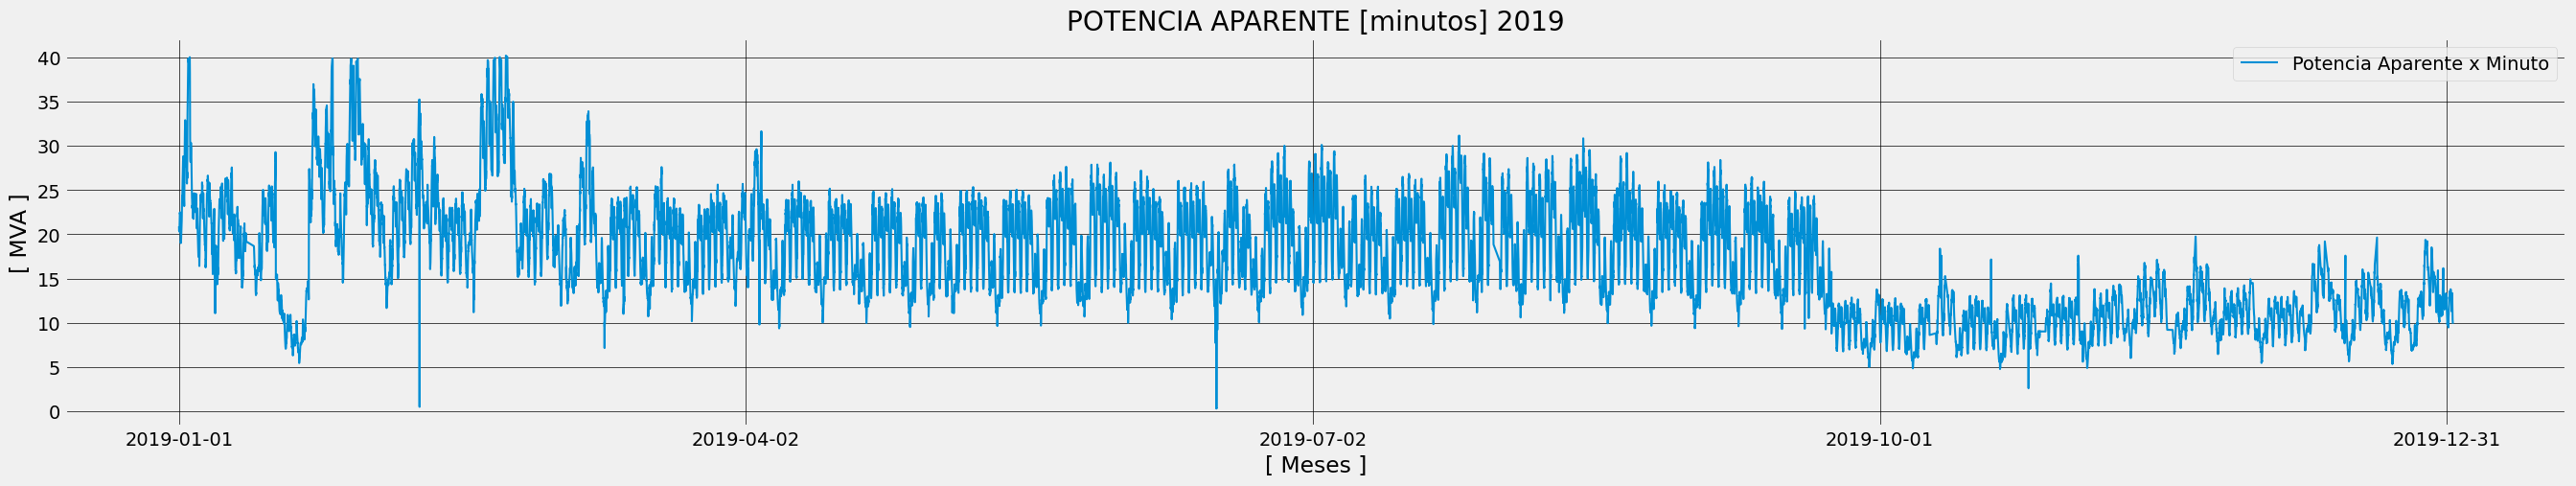

<Figure size 432x288 with 0 Axes>

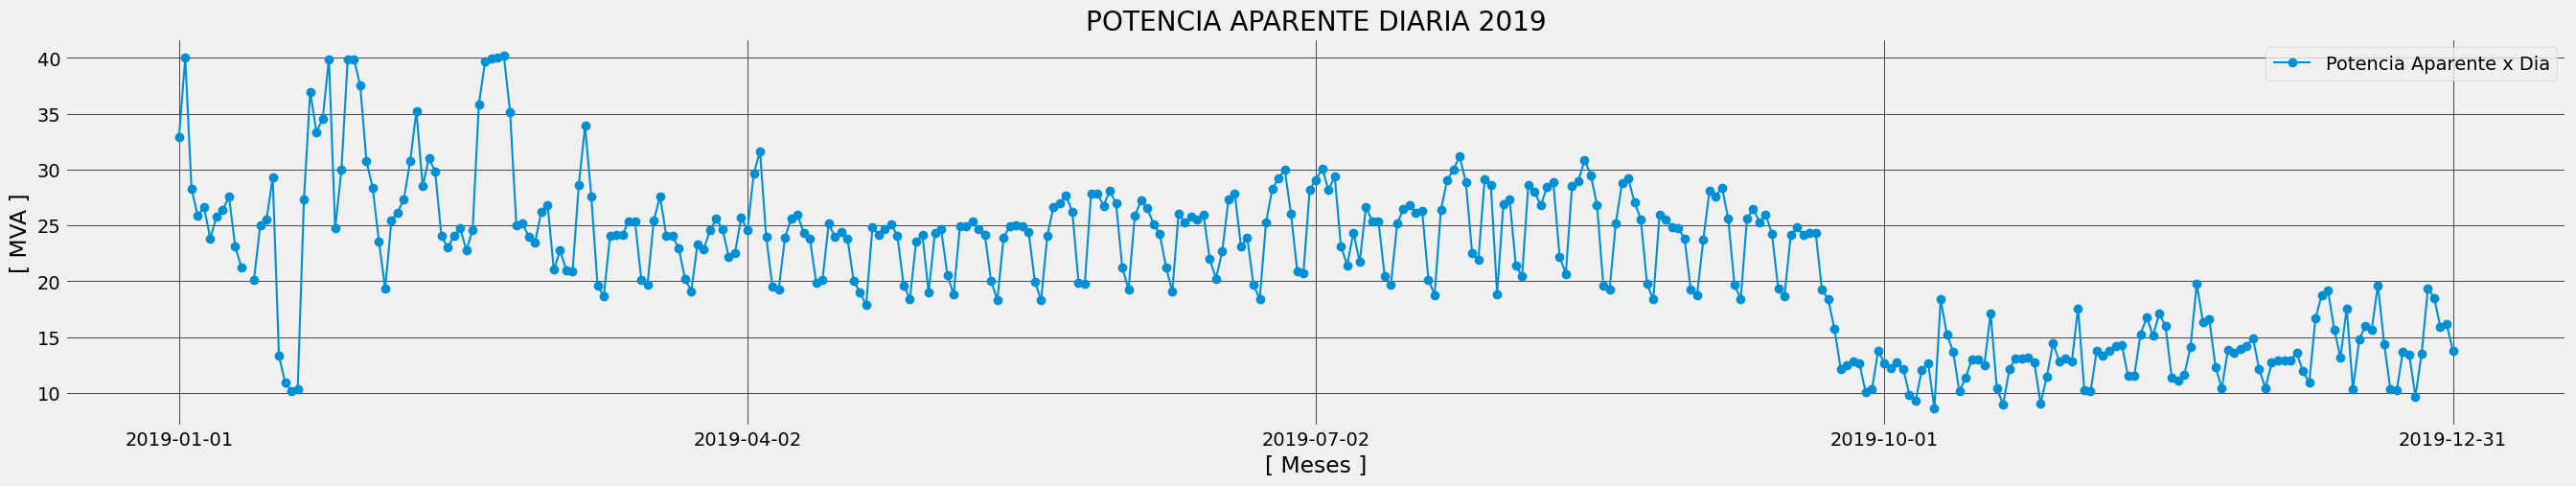

<Figure size 432x288 with 0 Axes>

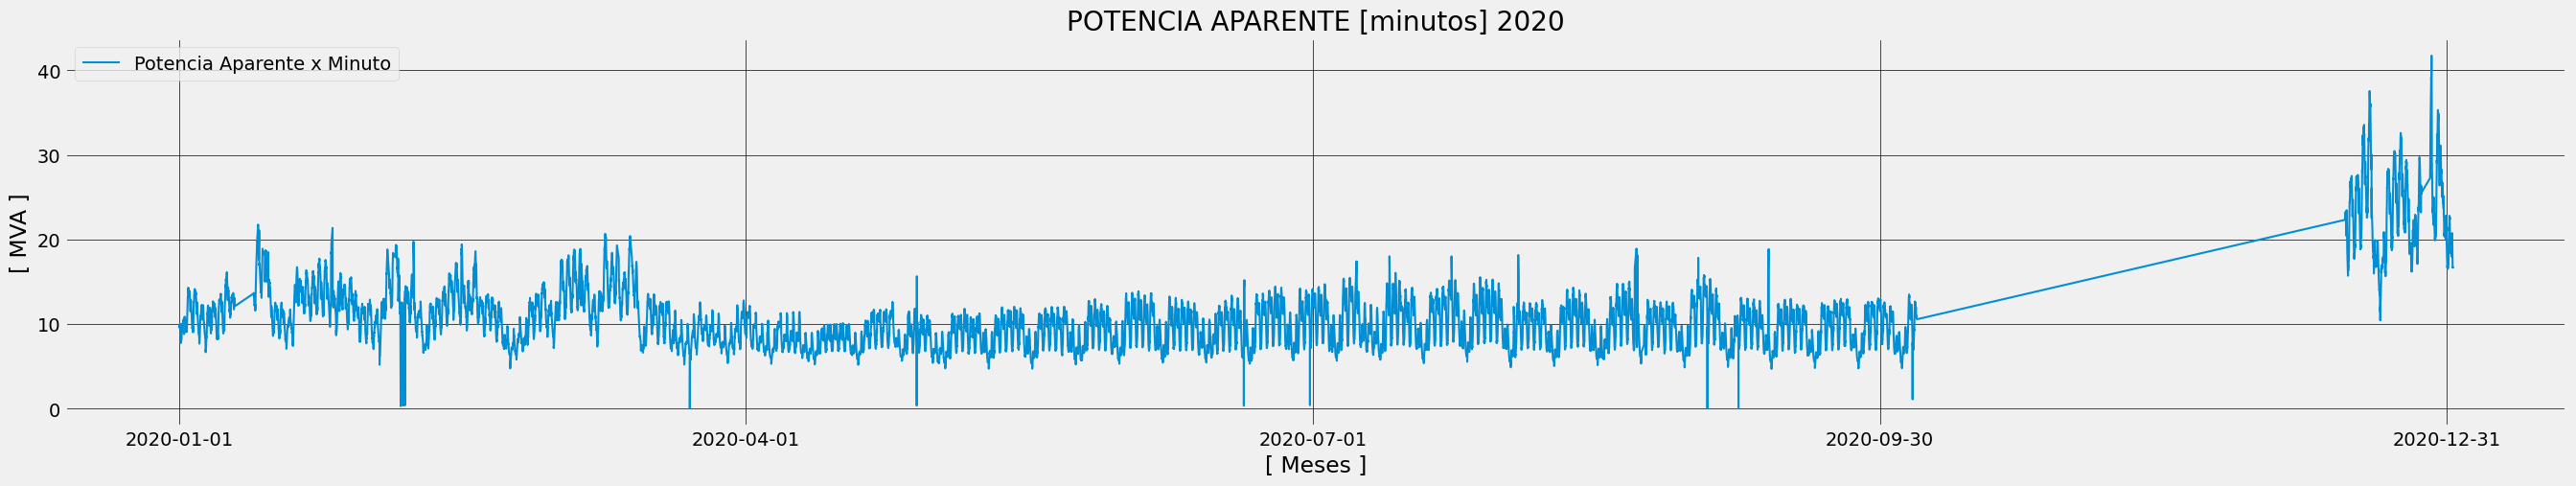

<Figure size 432x288 with 0 Axes>

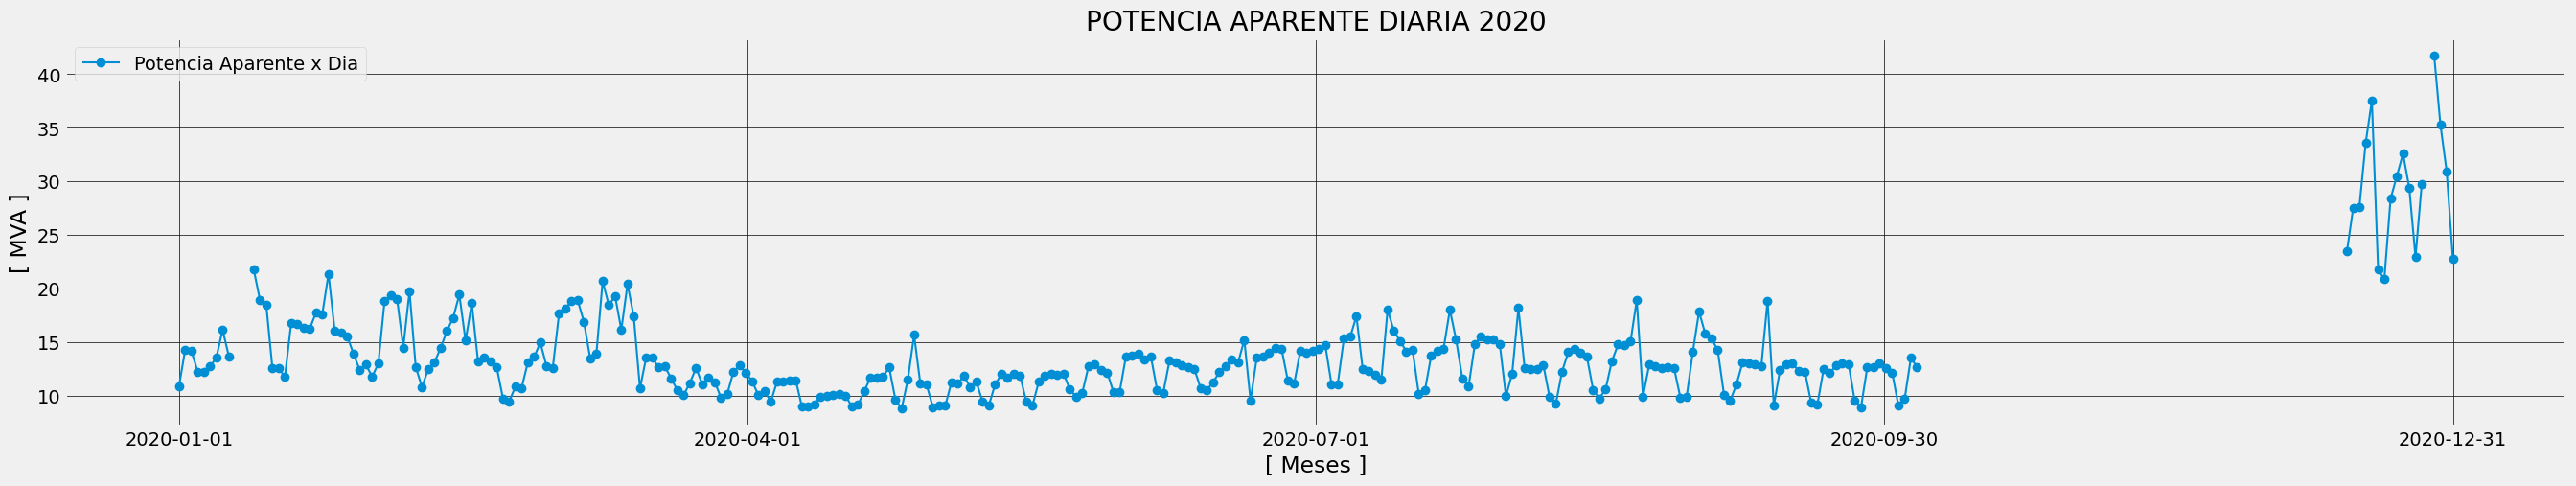

<Figure size 432x288 with 0 Axes>

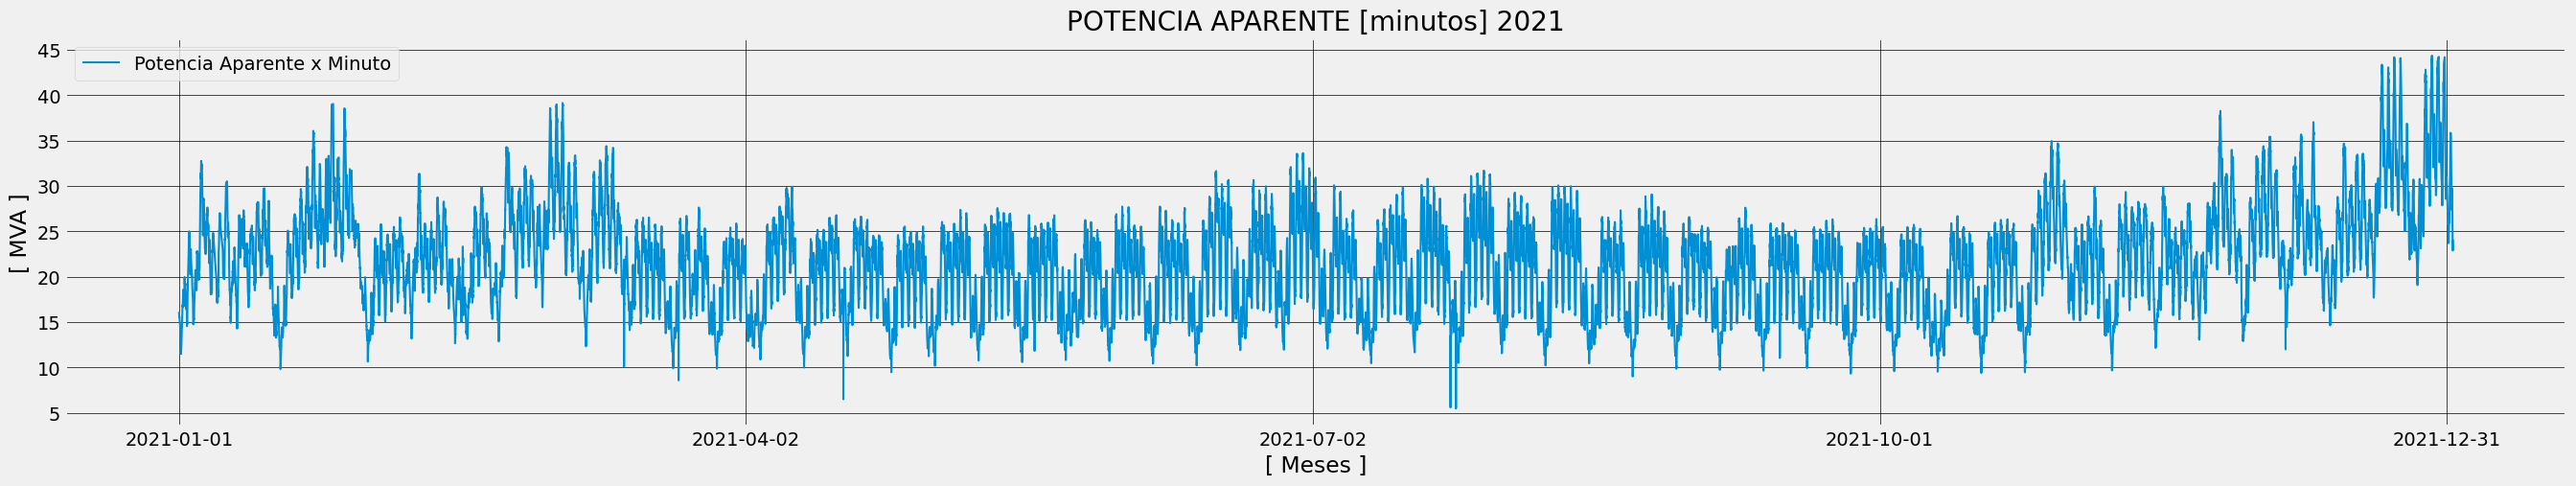

<Figure size 432x288 with 0 Axes>

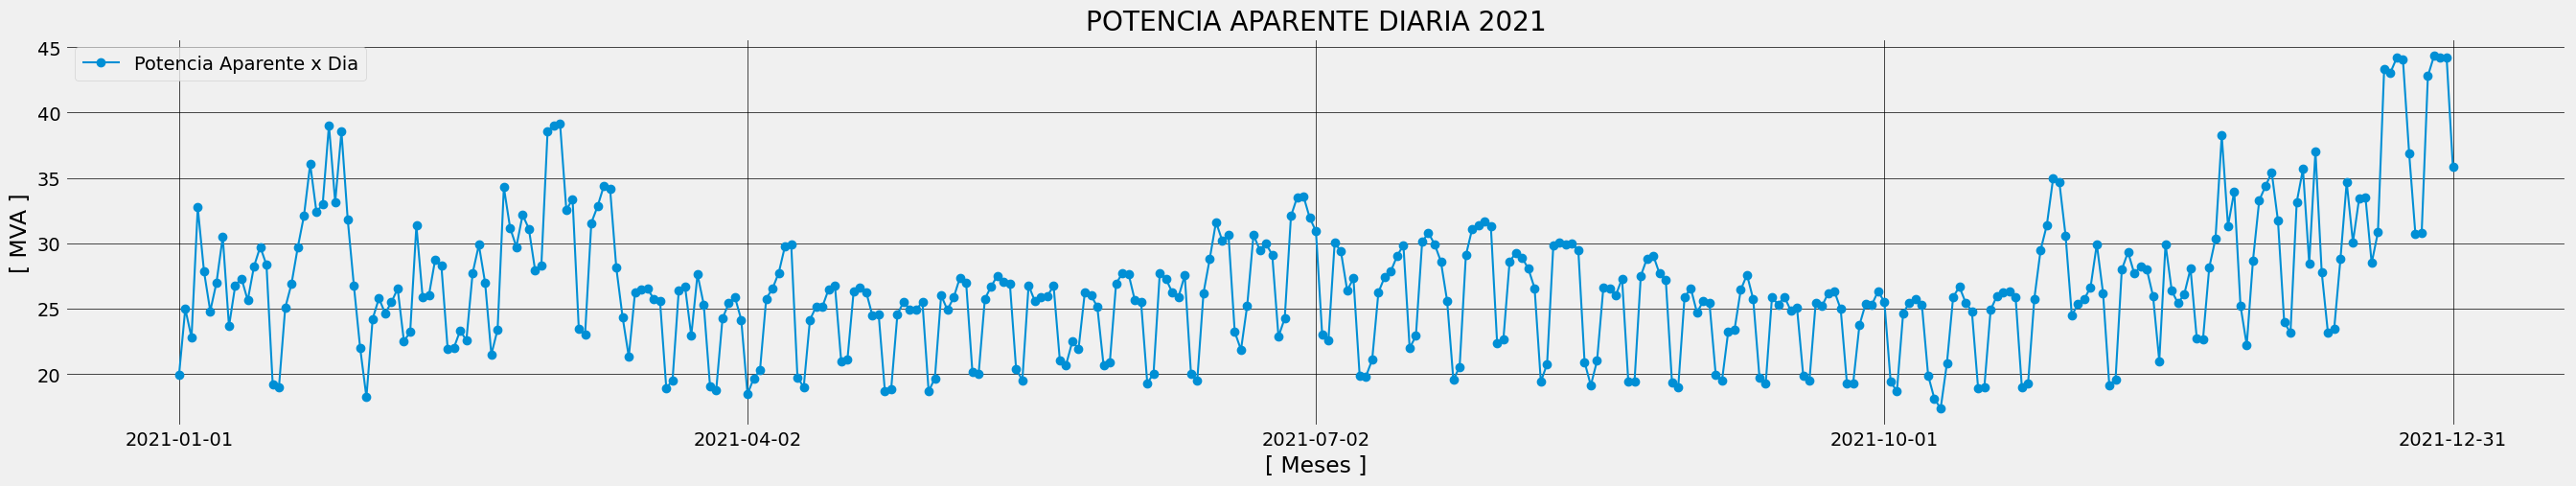

In [38]:
# LANZO LAS GRAFICAS 

anios = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

#Grafica_xSemana(anios[0], anios[-1])

for anio in anios:
    Grafica_xmin(anio, anio)
    Grafica_xDia(anio, anio)
    #Grafica_Pico_Anual(anio, anio)

## Pronosticos

### Tabla Historica

In [18]:
# 
# GENERAR TABLA EXCEL CON LOS DATOS DEPURADOS
#
anios_hist = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

Trafos = pd.Series([25.0, 25.0, 25.0], index=['TD1', 'TD2', 'TD3'])
POT_INSTALADA = Trafos.sum()

Historica = pd.DataFrame(columns = ['FECHA_HORA', 'P_MW', 'Q_MVAR', 'S_MVA'])

for anio in anios_hist:
    #Anio = pd.to_numeric(anio)
    fecha_hora_i = datos.loc[anio:anio, 'MVA'].idxmax()
    maximo_p     = datos.loc[fecha_hora_i, 'MW'].max()
    maximo_q     = datos.loc[fecha_hora_i, 'MVAR'].max()
    maximo_s     = datos.loc[fecha_hora_i, 'MVA'].max()
    Historica.loc[anio] = [fecha_hora_i, maximo_p, maximo_q, maximo_s]  
    
# Columnas derivadas
Historica['POT_INSTALADA'] = POT_INSTALADA
Historica['CRECIMIENTO_%'] = Historica['S_MVA'].pct_change().mul(100)
Historica['N-1'] = Historica['POT_INSTALADA'] - Trafos.max()   
Historica['CARGA_%'] = Historica['S_MVA'] / Historica['POT_INSTALADA'] * 100
Historica['ANIO'] = pd.to_numeric(Historica.index)

nombres_columnas = ['ANIO', 'FECHA_HORA', 'P_MW', 'Q_MVAR', 'S_MVA', 'CRECIMIENTO_%', 'POT_INSTALADA', 'N-1', 'CARGA_%']
Historica = Historica.reindex(columns=nombres_columnas)
Historica

ANIO          FECHA_HORA  P_MW  Q_MVAR  S_MVA  CRECIMIENTO_%  \
2010  2010 2010-01-05 14:00:00 36.24 8.89    37.32  NaN              
2011  2011 2011-12-20 16:30:00 37.51 10.09   38.85  4.10             
2012  2012 2012-02-16 14:15:00 41.38 9.28    42.41  9.16             
2013  2013 2013-12-26 15:00:00 41.97 7.88    42.70  0.68             
2014  2014 2014-01-23 16:30:00 40.87 7.47    41.55  -2.69            
2015  2015 2015-03-11 14:00:00 44.64 12.43   46.34  11.53            
2016  2016 2016-02-12 13:30:00 45.53 8.05    46.23  -0.24            
2017  2017 2017-03-02 13:15:00 45.16 5.41    45.48  -1.62            
2018  2018 2018-02-07 13:30:00 45.71 3.20    45.82  0.75             
2019  2019 2019-02-22 11:15:00 39.91 4.83    40.20  -12.27           
2020  2020 2020-12-28 13:15:00 41.71 1.59    41.74  3.83             
2021  2021 2021-12-28 15:15:00 44.35 0.59    44.36  6.28             

      POT_INSTALADA   N-1  CARGA_%  
2010 75.00          50.00 49.76     
2011 75.00          50.00 51.80     
2012 75.00          50.00 56.55     
2013 75.00          50.00 56.93     
2014 75.00          50.00 55.40     
2015 75.00          50.00 61.79     
2016 75.00          50.00 61.64     
2017 75.00          50.00 60.64     
2018 75.00          50.00 61.09     
2019 75.00          50.00 53.60     
2020 75.00          50.00 55.65     
2021 75.00          50.00 59.15

In [19]:
Historica.index

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021'],
      dtype='object')

### Regresion Lineal

In [20]:
pd.set_option('display.float_format', '{:.8f}'.format)
import statsmodels.formula.api as smf
lm = smf.ols(formula="S_MVA~ANIO", data = Historica).fit()
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.160  
Dependent Variable: S_MVA            AIC:                60.0485
Date:               2022-05-05 11:26 BIC:                61.0183
No. Observations:   12               Log-Likelihood:     -28.024
Df Model:           1                F-statistic:        3.096  
Df Residuals:       10               Prob (F-statistic): 0.109  
R-squared:          0.236            Scale:              7.5019 
----------------------------------------------------------------
             Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
----------------------------------------------------------------
Intercept  -769.5106 461.6366 -1.6669 0.1265 -1798.1010 259.0798
ANIO          0.4030   0.2290  1.7595 0.1090    -0.1073   0.9133
----------------------------------------------------------------
Omnibus:              1.836       Durbin-Watson:         1.026  
Prob(Omnibus):        0.399       Jarque-Bera (JB):      0.859  
Skew:                 -0.091      Prob(JB):              0.651  
Kurtosis:             1.702       Condition No.:         1176765
================================================================
* The condition number is large (1e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

In [21]:
pd.set_option('display.float_format', '{:.2f}'.format)

Historica['S_MVA_PRED'] = lm.predict(Historica['ANIO'])

nombres_columnas = ['ANIO', 'FECHA_HORA', 'P_MW', 'Q_MVAR', 'S_MVA', 'CRECIMIENTO_%', 'S_MVA_PRED', 'POT_INSTALADA', 'N-1', 'CARGA_%']
Historica = Historica.reindex(columns=nombres_columnas)
Historica

ANIO          FECHA_HORA  P_MW  Q_MVAR  S_MVA  CRECIMIENTO_%  \
2010  2010 2010-01-05 14:00:00 36.24 8.89    37.32  NaN              
2011  2011 2011-12-20 16:30:00 37.51 10.09   38.85  4.10             
2012  2012 2012-02-16 14:15:00 41.38 9.28    42.41  9.16             
2013  2013 2013-12-26 15:00:00 41.97 7.88    42.70  0.68             
2014  2014 2014-01-23 16:30:00 40.87 7.47    41.55  -2.69            
2015  2015 2015-03-11 14:00:00 44.64 12.43   46.34  11.53            
2016  2016 2016-02-12 13:30:00 45.53 8.05    46.23  -0.24            
2017  2017 2017-03-02 13:15:00 45.16 5.41    45.48  -1.62            
2018  2018 2018-02-07 13:30:00 45.71 3.20    45.82  0.75             
2019  2019 2019-02-22 11:15:00 39.91 4.83    40.20  -12.27           
2020  2020 2020-12-28 13:15:00 41.71 1.59    41.74  3.83             
2021  2021 2021-12-28 15:15:00 44.35 0.59    44.36  6.28             

      S_MVA_PRED  POT_INSTALADA   N-1  CARGA_%  
2010 40.53       75.00          50.00 49.76     
2011 40.94       75.00          50.00 51.80     
2012 41.34       75.00          50.00 56.55     
2013 41.74       75.00          50.00 56.93     
2014 42.15       75.00          50.00 55.40     
2015 42.55       75.00          50.00 61.79     
2016 42.95       75.00          50.00 61.64     
2017 43.35       75.00          50.00 60.64     
2018 43.76       75.00          50.00 61.09     
2019 44.16       75.00          50.00 53.60     
2020 44.56       75.00          50.00 55.65     
2021 44.97       75.00          50.00 59.15

In [22]:
print('Parametros : ', lm.params) 
print('R2 : ', lm.rsquared)

Parametros :  Intercept   -769.51
ANIO        0.40   
dtype: float64
R2 :  0.23640418760426574


### Tabla de Pronosticos

In [23]:
#
#  AGREGO LOS AÑOS DE PRONOSTICO PROPIAMENTE DICHO
#
#Pronostico  = Tablaxls.copy()
pd.set_option('display.float_format', '{:.2f}'.format)
anios_pro = ['2022', '2023', '2024', '2025', '2026']
POT_INSTALADA = Trafos.sum()
Precaucion    = POT_INSTALADA - Trafos.max()

Anio = pd.Series(pd.to_numeric(anios_pro), index=anios_pro)
Fecha_Hora = pd.Series(np.nan, index= anios_pro)
P_MW   = pd.Series(np.nan, index=anios_pro)
Q_MVAR = pd.Series(np.nan, index=anios_pro)
S_MVA  = pd.Series(np.nan, index=anios_pro)
Crecimiento = pd.Series(np.nan, index=anios_pro)

Pronostico = pd.DataFrame({'ANIO':Anio, 
                           'FECHA_HORA':Fecha_Hora, 
                           'P_MW':P_MW, 
                           'Q_MVAR':Q_MVAR,
                           'S_MVA':S_MVA,
                           'CRECIMIENTO_%':Crecimiento}, index=anios_pro)

# El MODELO DE REGRESION LINEAL         
Pronostico['S_MVA_PRED'] = 0.51372727*Pronostico["ANIO"] - 991.015000
#
Pronostico['POT_INSTALADA'] = POT_INSTALADA
Pronostico['N-1'] = Pronostico['POT_INSTALADA'] - Trafos.max()  
Pronostico['CARGA_%'] = Pronostico['S_MVA_PRED'] / Pronostico['POT_INSTALADA'] * 100 

# nombres_columnas = ['FECHA_HORA', 'P_MW', 'Q_MVAR', 'S_MVA', 'Crecimiento %', 'Pot_Instalada', 'N-1', '% Carga']
#Tablaxls = Tablaxls.reindex(columns=nombres_columnas)

Pronostico

ANIO  FECHA_HORA  P_MW  Q_MVAR  S_MVA  CRECIMIENTO_%  S_MVA_PRED  \
2022  2022 NaN         NaN   NaN     NaN    NaN            47.74         
2023  2023 NaN         NaN   NaN     NaN    NaN            48.26         
2024  2024 NaN         NaN   NaN     NaN    NaN            48.77         
2025  2025 NaN         NaN   NaN     NaN    NaN            49.28         
2026  2026 NaN         NaN   NaN     NaN    NaN            49.80         

      POT_INSTALADA   N-1  CARGA_%  
2022 75.00          50.00 63.66     
2023 75.00          50.00 64.34     
2024 75.00          50.00 65.03     
2025 75.00          50.00 65.71     
2026 75.00          50.00 66.40

In [24]:
#
# CONCATENAR LA TABLA HISTORICA + TABLA PRONOSTICO
#
Tablaxls = pd.concat([Historica,Pronostico], axis = 0)
Tablaxls

ANIO           FECHA_HORA  P_MW  Q_MVAR  S_MVA  CRECIMIENTO_%  \
2010  2010  2010-01-05 14:00:00 36.24 8.89    37.32  NaN              
2011  2011  2011-12-20 16:30:00 37.51 10.09   38.85  4.10             
2012  2012  2012-02-16 14:15:00 41.38 9.28    42.41  9.16             
2013  2013  2013-12-26 15:00:00 41.97 7.88    42.70  0.68             
2014  2014  2014-01-23 16:30:00 40.87 7.47    41.55  -2.69            
2015  2015  2015-03-11 14:00:00 44.64 12.43   46.34  11.53            
2016  2016  2016-02-12 13:30:00 45.53 8.05    46.23  -0.24            
2017  2017  2017-03-02 13:15:00 45.16 5.41    45.48  -1.62            
2018  2018  2018-02-07 13:30:00 45.71 3.20    45.82  0.75             
2019  2019  2019-02-22 11:15:00 39.91 4.83    40.20  -12.27           
2020  2020  2020-12-28 13:15:00 41.71 1.59    41.74  3.83             
2021  2021  2021-12-28 15:15:00 44.35 0.59    44.36  6.28             
2022  2022  NaN                 NaN   NaN     NaN    NaN              
2023  2023  NaN                 NaN   NaN     NaN    NaN              
2024  2024  NaN                 NaN   NaN     NaN    NaN              
2025  2025  NaN                 NaN   NaN     NaN    NaN              
2026  2026  NaN                 NaN   NaN     NaN    NaN              

      S_MVA_PRED  POT_INSTALADA   N-1  CARGA_%  
2010 40.53       75.00          50.00 49.76     
2011 40.94       75.00          50.00 51.80     
2012 41.34       75.00          50.00 56.55     
2013 41.74       75.00          50.00 56.93     
2014 42.15       75.00          50.00 55.40     
2015 42.55       75.00          50.00 61.79     
2016 42.95       75.00          50.00 61.64     
2017 43.35       75.00          50.00 60.64     
2018 43.76       75.00          50.00 61.09     
2019 44.16       75.00          50.00 53.60     
2020 44.56       75.00          50.00 55.65     
2021 44.97       75.00          50.00 59.15     
2022 47.74       75.00          50.00 63.66     
2023 48.26       75.00          50.00 64.34     
2024 48.77       75.00          50.00 65.03     
2025 49.28       75.00          50.00 65.71     
2026 49.80       75.00          50.00 66.40

### Graficas al 2026

In [32]:
# Grafica anual de la Potencia Aparente cada 15 minutos
# (Trafos + Generacion)

def Grafica_Hist_Pred():
    plt.style.use('fivethirtyeight')
    
    #y = Tablaxls.loc['2010':'2021', 'S_MVA']
    #x_y = Tablaxls.loc['2010':'2021', 'ANIO']
    
    y = Tablaxls.loc[:, 'S_MVA']
    pred = Tablaxls.loc[:, 'S_MVA_PRED']
    p_inst = Tablaxls.loc[:, 'POT_INSTALADA']
    precau = Tablaxls.loc[:, 'N-1']
    
    x = Tablaxls.loc[:, 'ANIO']
    
    fig = plt.figure()
    fig, grafico = plt.subplots(figsize=(15, 5), dpi=100) 
    #grafico.plot(x, y, lw=1, label='Potencia Aparente', marker='o')
    grafico.plot(x, y, lw=3, label='Pot. Historica', marker='o', color='k')
    grafico.plot(x, pred, lw=3, label='Tend. Lineal', marker='o', linestyle='dotted', color='b')
    grafico.plot(x, p_inst, lw=2, label='Pot.Instalada', color='r')
    grafico.plot(x, precau, lw=2, label='Precaucion N-1', color='y')
    
    grafico.set_ylim ([20,90])
    
    grafico.set_xlabel('[ Años ]')  # Add an x-label to the axes.
    grafico.set_ylabel('[ MVA ]')  # Add a y-label to the axes.
    grafico.set_title("ET San Francisco: Demanda Historica y Pronostico al 2026 ")  # Add a title to the axes.
    grafico.legend(loc='lower right')  # Add a legend.
    #grafico.annotate('Pico Max', xy=(01-31 14:45, 75), xytext=(01-31 15:00, 75), arrowprops=dict(facecolor='black', shrink=0.05)
    #grafico.grid() 
    
    #fig.savefig("Serie_Anual_15min_"+anio+".png")

<Figure size 432x288 with 0 Axes>

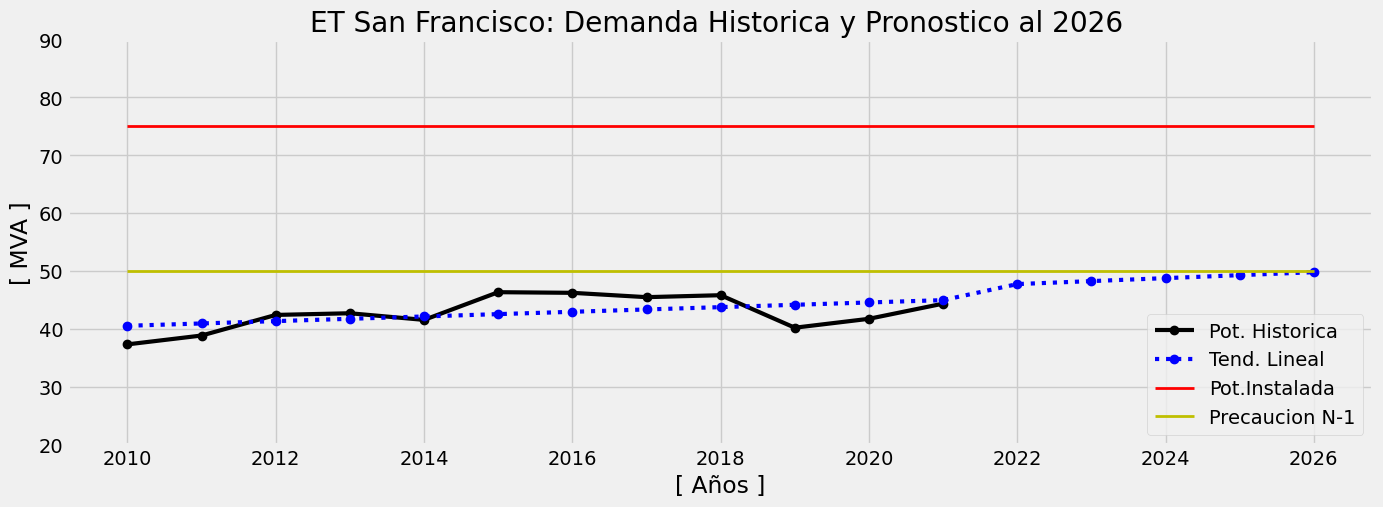

In [33]:
Grafica_Hist_Pred()

In [27]:
Tablaxls["RSE"] = (Tablaxls["S_MVA"]-Tablaxls["S_MVA_PRED"])**2
Tablaxls

ANIO           FECHA_HORA  P_MW  Q_MVAR  S_MVA  CRECIMIENTO_%  \
2010  2010  2010-01-05 14:00:00 36.24 8.89    37.32  NaN              
2011  2011  2011-12-20 16:30:00 37.51 10.09   38.85  4.10             
2012  2012  2012-02-16 14:15:00 41.38 9.28    42.41  9.16             
2013  2013  2013-12-26 15:00:00 41.97 7.88    42.70  0.68             
2014  2014  2014-01-23 16:30:00 40.87 7.47    41.55  -2.69            
2015  2015  2015-03-11 14:00:00 44.64 12.43   46.34  11.53            
2016  2016  2016-02-12 13:30:00 45.53 8.05    46.23  -0.24            
2017  2017  2017-03-02 13:15:00 45.16 5.41    45.48  -1.62            
2018  2018  2018-02-07 13:30:00 45.71 3.20    45.82  0.75             
2019  2019  2019-02-22 11:15:00 39.91 4.83    40.20  -12.27           
2020  2020  2020-12-28 13:15:00 41.71 1.59    41.74  3.83             
2021  2021  2021-12-28 15:15:00 44.35 0.59    44.36  6.28             
2022  2022  NaN                 NaN   NaN     NaN    NaN              
2023  2023  NaN                 NaN   NaN     NaN    NaN              
2024  2024  NaN                 NaN   NaN     NaN    NaN              
2025  2025  NaN                 NaN   NaN     NaN    NaN              
2026  2026  NaN                 NaN   NaN     NaN    NaN              

      S_MVA_PRED  POT_INSTALADA   N-1  CARGA_%   RSE  
2010 40.53       75.00          50.00 49.76    10.33  
2011 40.94       75.00          50.00 51.80    4.35   
2012 41.34       75.00          50.00 56.55    1.15   
2013 41.74       75.00          50.00 56.93    0.92   
2014 42.15       75.00          50.00 55.40    0.35   
2015 42.55       75.00          50.00 61.79    14.38  
2016 42.95       75.00          50.00 61.64    10.75  
2017 43.35       75.00          50.00 60.64    4.52   
2018 43.76       75.00          50.00 61.09    4.25   
2019 44.16       75.00          50.00 53.60    15.69  
2020 44.56       75.00          50.00 55.65    7.97   
2021 44.97       75.00          50.00 59.15    0.37   
2022 47.74       75.00          50.00 63.66    NaN    
2023 48.26       75.00          50.00 64.34    NaN    
2024 48.77       75.00          50.00 65.03    NaN    
2025 49.28       75.00          50.00 65.71    NaN    
2026 49.80       75.00          50.00 66.40    NaN

(array([2., 1., 1., 0., 2., 0., 2., 2., 0., 2.]),
 array([-3.96052448, -3.18532168, -2.41011888, -1.63491608, -0.85971329,
        -0.08451049,  0.69069231,  1.4658951 ,  2.2410979 ,  3.0163007 ,
         3.7915035 ]),
 <BarContainer object of 10 artists>)

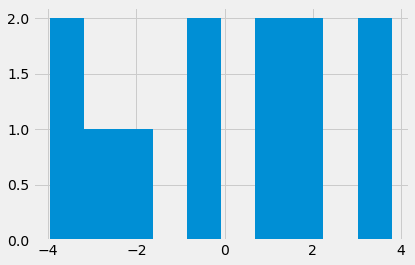

In [28]:
plt.hist((Tablaxls["S_MVA"]-Tablaxls["S_MVA_PRED"]))

In [29]:
Tablaxls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2010 to 2026
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ANIO           17 non-null     int64  
 1   FECHA_HORA     12 non-null     object 
 2   P_MW           12 non-null     float64
 3   Q_MVAR         12 non-null     float64
 4   S_MVA          12 non-null     float64
 5   CRECIMIENTO_%  11 non-null     float64
 6   S_MVA_PRED     17 non-null     float64
 7   POT_INSTALADA  17 non-null     float64
 8   N-1            17 non-null     float64
 9   CARGA_%        17 non-null     float64
 10  RSE            12 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 1.6+ KB


## Conclusiones